<div class="alert alert-block alert-info">    

# **Multiclass classification**   
</div>

Group 47 

Patrícia Braga Torres - 20201518  

Mafalda de Oliveira e Sousa Antunes - 20201565  

Mikołaj Jarząbkowski - 20230529  

Beatriz Leonardo Vasconcelos - 20230755 

Joana Coelho Gonçalves - 20230977  


## Table of contents
[<font color='#2f5496'>1. Data preprocessing</font>](#one-bullet) <br>
    [<font color='#2f5496'>1.2. Data visualization</font>](#two-bullet) <br>
    [<font color='#2f5496'>1.3. Transforming/organizing data</font>](#three-bullet) <br>
    [<font color='#2f5496'>1.4. Outliers</font>](#four-bullet) <br>
    [<font color='#2f5496'>1.4.1. Metric variables</font>](#five-bullet) <br>
    [<font color='#2f5496'>1.4.2. Non metric variables</font>](#six-bullet)        
    [<font color='#2f5496'>1.5. Missing Values</font>](#seven-bullet) <br>
    [<font color='#2f5496'>1.6. Feature engineering</font>](#eight-bullet) <br>

[<font color='#2f5496'>2. Feature selection</font>](#nine-bullet) <br>
    [<font color='#2f5496'>2.1. Mutual information</font>](#ten-bullet) <br>
    [<font color='#2f5496'>2.2. Boruta</font>](#eleven-bullet) <br>
    [<font color='#2f5496'>2.3. Ridge regression</font>](#twelve-bullet) <br>
    [<font color='#2f5496'>2.4. RFE</font>](#13-bullet) <br>
    [<font color='#2f5496'>2.5. Select K Best</font>](#14-bullet) <br>
    [<font color='#2f5496'>2.6. Random Forest</font>](#15-bullet) <br>
    [<font color='#2f5496'>2.7. LASSO regression</font>](#16-bullet) <br>

[<font color='#2f5496'>3. Model testing</font>](#17-bullet) <br>
    [<font color='#2f5496'>3.1. Decision Tree</font>](#18-bullet) <br>
    [<font color='#2f5496'>3.2. Random Forest</font>](#19-bullet) <br>
    [<font color='#2f5496'>3.3. AdaBoost</font>](#20-bullet) <br>
    [<font color='#2f5496'>3.4. Neural Network</font>](#21-bullet) <br>
    [<font color='#2f5496'>3.5. Naive Bayes</font>](#22-bullet) <br>

### Imports

In [1]:
# Working with data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

# Tools for visualizations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from math import ceil

#Feature selection
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import RFE, SelectKBest, RFECV, f_classif, mutual_info_classif
from sklearn.linear_model import LassoCV, Ridge
import scipy.stats as stats

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#%pip install boruta
from boruta import BorutaPy
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<a class="anchor" id="one-bullet">     

# 1. Data preprocessing
</a>    
</div>

<div class="alert alert-block alert-success">
<a class="anchor" id="two-bullet">    

## 1.2. Data exploration
 </a>
    
</div>

In [2]:
data = pd.read_csv('train.csv', index_col ='encounter_id', na_values=['?', '[]'])

In [3]:
data.tail().T

encounter_id,660160,826429,332030,757560,459757
country,USA,USA,USA,USA,USA
patient_id,24531381,4663818,23397147,52161750,88410897
race,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[80-90),[70-80),[60-70),[60-70),[70-80)
weight,NaN,NaN,NaN,NaN,NaN
payer_code,MC,NaN,NaN,BC,BC
outpatient_visits_in_previous_year,0,0,0,0,0
emergency_visits_in_previous_year,1,0,2,0,0
inpatient_visits_in_previous_year,0,0,2,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   66166 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 2246 non-null   object
 6   payer_code                             43035 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_s

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,66166,5,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,2246,9,[75-100),933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,43035,17,MC,22683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


In [6]:
# No duplicated rows
data.duplicated().sum()

0

In [7]:
data['readmitted_multiclass'].value_counts(normalize=True)

readmitted_multiclass
No          0.539123
>30 days    0.349276
<30 days    0.111601
Name: proportion, dtype: float64

### <mark> Classes imbalanced!

<div class="alert alert-block alert-success">
<a class="anchor" id="three-bullet">    

## 1.3. Transforming/organizing data
 </a>
    
</div>

In [5]:
# Renaming variables
new_names = {'outpatient_visits_in_previous_year':'outpatient_visits',
             'emergency_visits_in_previous_year':'emergency_visits',
             'inpatient_visits_in_previous_year': 'inpatient_visits',
             'length_of_stay_in_hospital':'length_of_stay',
             'change_in_meds_during_hospitalization':'change_in_meds'
            }
data = data.rename(columns=new_names)

In [6]:
# Variables for metric and non metric features
metric_feats = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'patient_id']
non_metric_feats = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis','additional_diagnosis', 'medication', 'country', 'weight', 'medical_specialty']

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

## 1.4. Outliers
 </a>
    
</div>

<div class="alert alert-block alert-success">
<a class="anchor" id="five-bullet">    

### 1.4.1. Metric variables
 </a>
    
</div>

#### Visualization of distributions

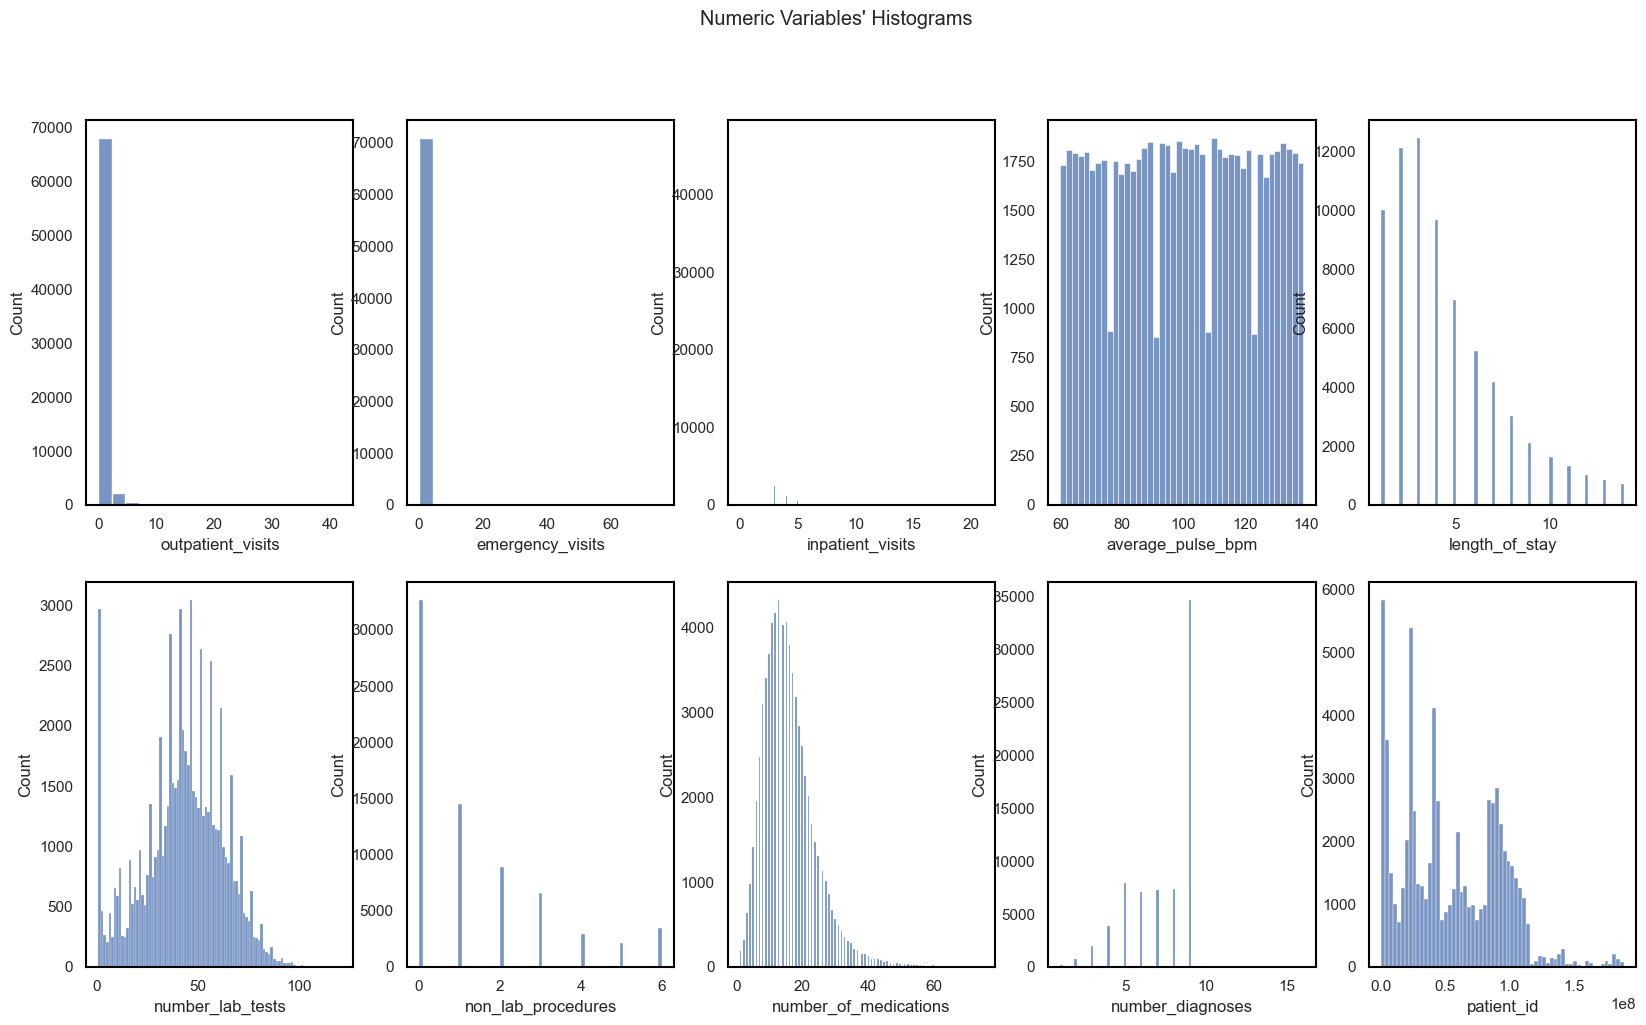

In [10]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_feats):
    sns.histplot(x=data[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

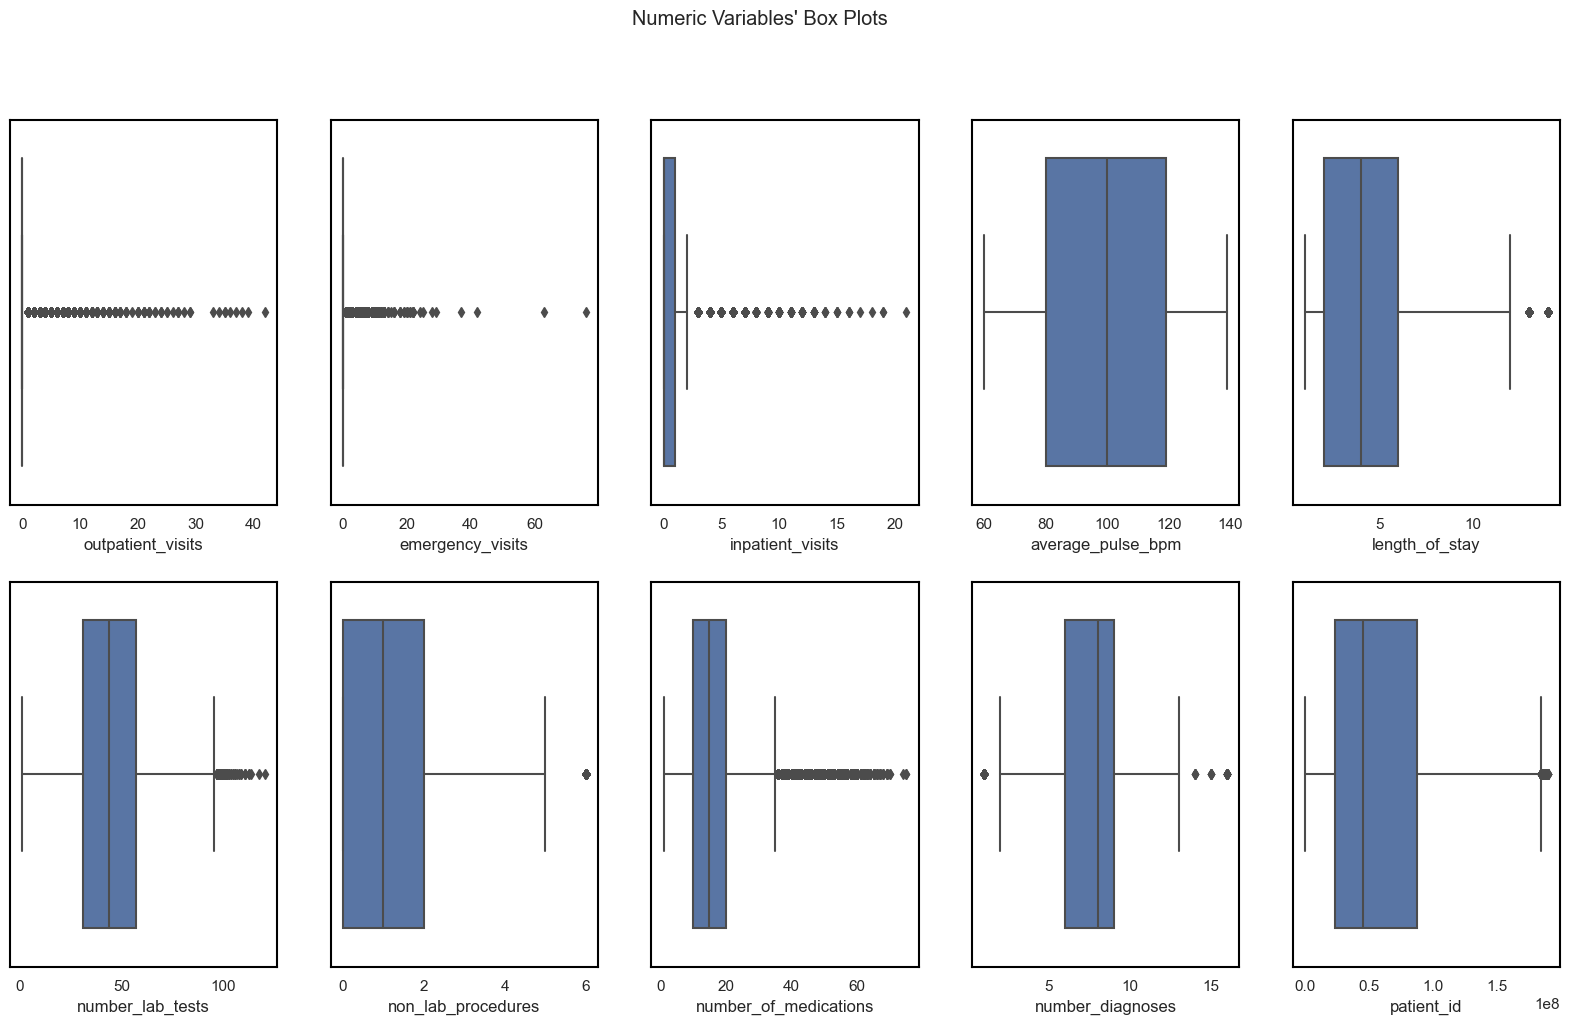

In [11]:
# Boxplots to visualise outliers
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### Transformations

In [7]:
#in the variables that have the distributions right skewed 
feats_to_log = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'length_of_stay', 'non_lab_procedures', 'number_of_medications']
# Log transformation of metric features
data[feats_to_log] = np.log1p(data[feats_to_log])

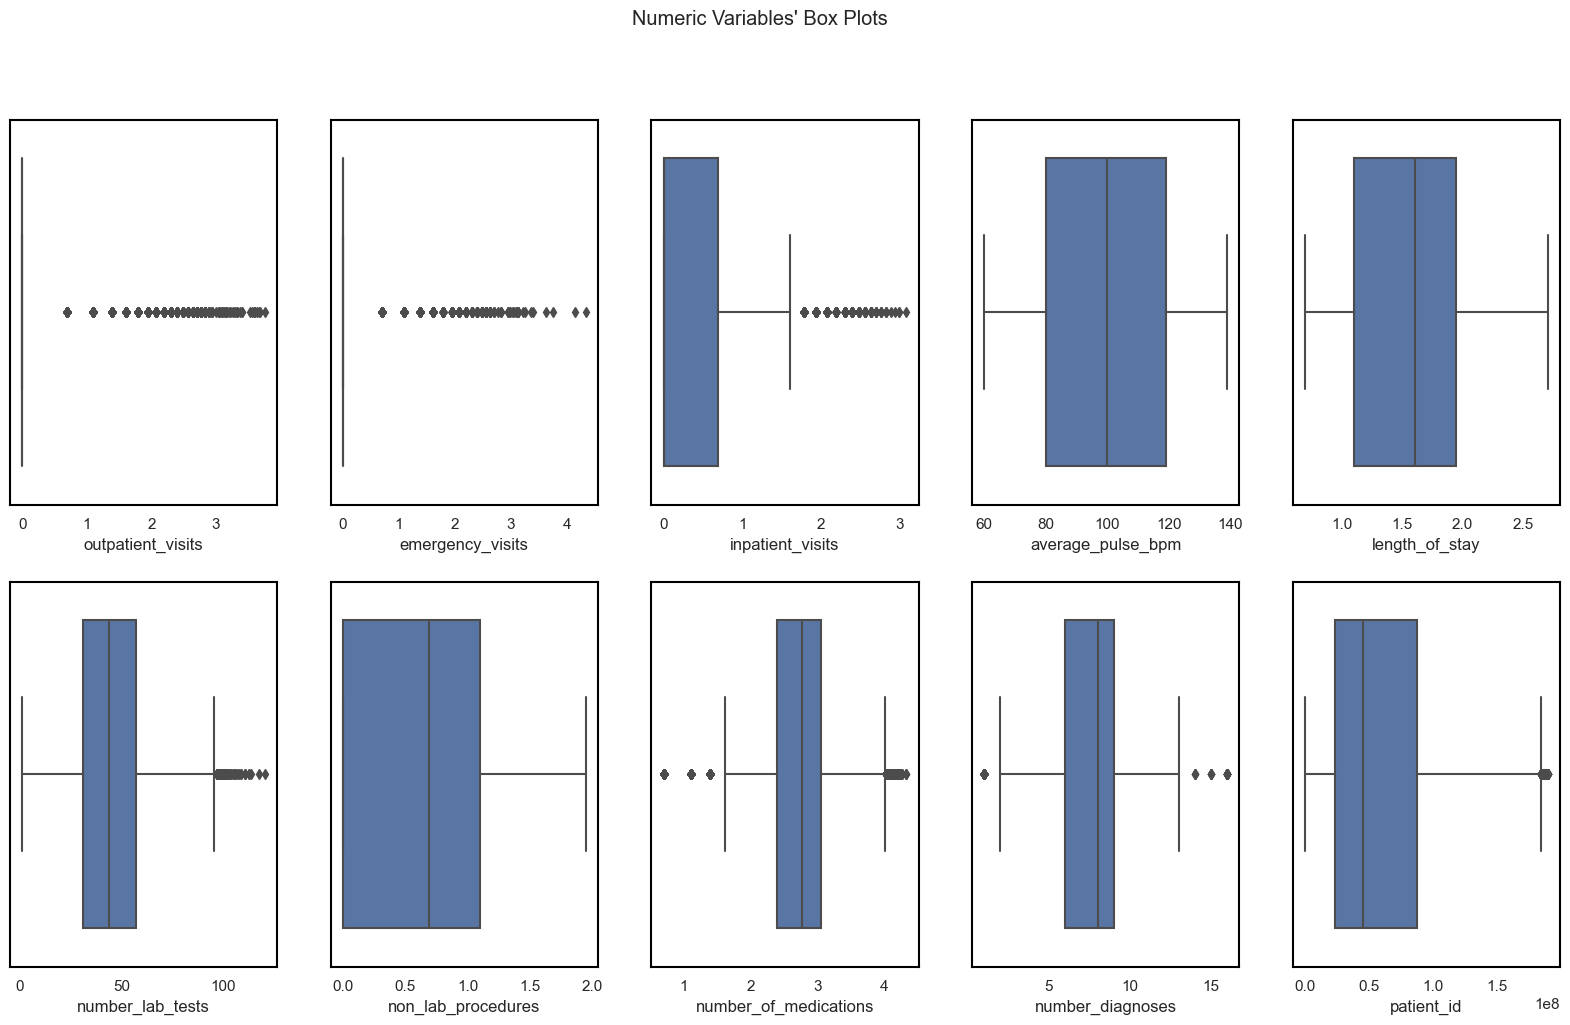

In [13]:
# Boxplots to visualise outliers
# we need to visualie again to see the differences from the log transformations
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

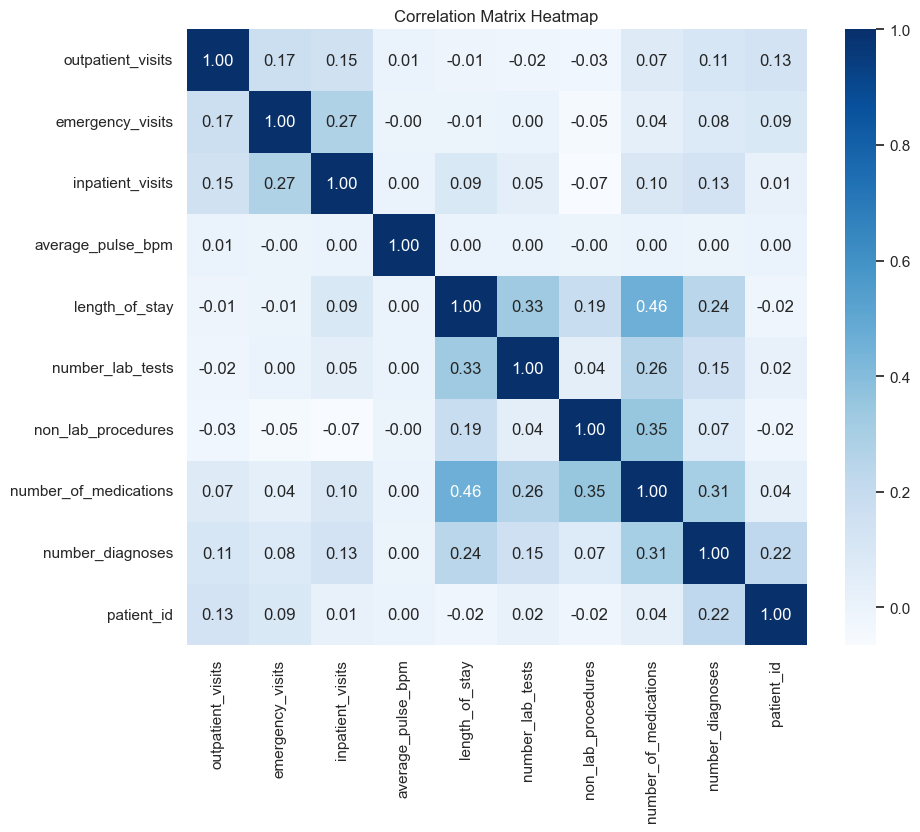

In [14]:
# Correlation Matrix
correlation_matrix = data[metric_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation coefficients whose magnitude are between **_0.7 and 0.9_** indicate variables which can be considered <mark>highly correlated</mark>. Correlation coefficients whose magnitude are between **0.5 and 0.7** indicate variables which can be considered <mark>moderately correlated</mark>.

<mark>In the following heatmap the only values that are somewhat related are number_of_medications and length_of_stay, but considering that the value is only **0.46**, taking these values into account would be too far-fetched.</mark>

In [8]:
# average_pulse_bpm isn't correlated with any of the other variables. Therefore, can be dropped since it doesn't provide usefull information 
data.drop('average_pulse_bpm', axis=1, inplace=True)

metric_feats.remove('average_pulse_bpm')

#### Outliers removal for Metric Variables

Metric features have no missing values, so we can proceed to outlier removal.

_Removing outliers using **Z-Score**._

In [16]:
df_zz = data[metric_feats].copy()
z = np.abs(stats.zscore(df_zz))
threshold = 3
df_zzz = df_zz[(z < 3).all(axis=1)]

print(df_zz.shape)
print(df_zzz.shape)
print("Numbers of rows deleted:", df_zz.shape[0]-df_zzz.shape[0], "\nThat makes", np.round(((df_zz.shape[0]-df_zzz.shape[0])/df_zz.shape[0])*100, 2), "% of the data.")


(71236, 9)
(65206, 9)
Numbers of rows deleted: 6030 
That makes 8.46 % of the data.


_Removing outliers using **IQR Score**._

IQL Score is a variable option of outliers removal only if there is more than one dataset, so we can ignore that. Should we write about it in report??

In [17]:
df_aa = data[metric_feats].copy()

Q1 = df_aa.quantile(0.25)
Q3 = df_aa.quantile(0.75)
IQR = Q3 - Q1
df_aaa = df_aa[~((df_aa < (Q1 - 1.5 * IQR)) |(df_aa > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_aa.shape)
print(df_aaa.shape)
print("Numbers of rows deleted:", df_aa.shape[0]-df_aaa.shape[0], "\nThat makes", np.round(((df_aa.shape[0]-df_aaa.shape[0])/df_aa.shape[0])*100, 2), "% of the data.")

(71236, 9)
(52311, 9)
Numbers of rows deleted: 18925 
That makes 26.57 % of the data.


<mark>Removing too many outliers, can't take that into consideration</mark>

_Removing outliers using **Visual Inspection**._

In [9]:
df_out = data.copy()

filters = (
    (df_out['number_diagnoses']<14) 
    & (df_out['number_of_medications']<4)
    & (df_out['number_lab_tests']<=100)
    & (df_out['inpatient_visits']<=2) 
    & (df_out['emergency_visits']<3) 
    & (df_out['outpatient_visits']<2) 
)

data_1 = df_out[filters]
print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9823


In [10]:
data = data_1.copy()

<mark>The best result we will keep this option</mark>

<div class="alert alert-block alert-success">
<a class="anchor" id="six-bullet">    

### 1.4.2. Non metric features
 </a>
    
</div>

**Mapping Age**

In [11]:
# Encode 'age', but preserve nans, for later imputation

def map_to_age(age):
    if age == '[0-10)':
        return 10
    elif age == '[10-20)':
        return 20
    elif age == '[20-30)':
        return 30
    elif age == '[30-40)':
        return 40
    elif age == '[40-50)':
        return 50
    elif age == '[50-60)':
        return 60
    elif age == '[60-70)':
        return 70
    elif age == '[70-80)':
        return 80
    elif age == '[80-90)':
        return 90
    elif age == '[90-100)':
        return 100
    else:
        return np.nan

In [12]:
data['age'] = data['age'].apply(map_to_age).astype(float)

**Mapping Diagnosis Features**

In [13]:
# Create function to apply classes of diseases to diagnosis features
def map_to_class(diagnosis_feature):
    if diagnosis_feature.startswith('V'):
        return 18
    elif diagnosis_feature.startswith('E'):
        return 19
    else:
        number = float(diagnosis_feature)

        if number < 140:
            return 1
        elif number < 240:
            return 2
        elif number < 280:
            return 3
        elif number < 290:
            return 4
        elif number < 320:
            return 5
        elif number < 390:
            return 6
        elif number < 460:
            return 7
        elif number < 520:
            return 8
        elif number < 580:
            return 9
        elif number < 630:
            return 10
        elif number < 680:
            return 11
        elif number < 710:
            return 12
        elif number < 740:
            return 13
        elif number < 760:
            return 14
        elif number < 780:
            return 15
        elif number < 800:
            return 16
        elif number < 1000:
            return 17
        else:
            return np.nan


In [14]:
data['primary_diagnosis'] = data['primary_diagnosis'].astype(str).apply(map_to_class)
data['secondary_diagnosis'] = data['secondary_diagnosis'].astype(str).apply(map_to_class)
data['additional_diagnosis'] = data['additional_diagnosis'].astype(str).apply(map_to_class)

**Mapping Discharged Dispostion**

In [15]:
def group_discharge(discharge_disposition):
    home_keywords = ['Discharged to home', 'Discharged/transferred to home with home health service', 'Discharged/transferred to home under care of Home IV provider']
    
    long_term_care_keywords = ['Discharged/transferred to a long term care hospital.', 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
    
    expired_hospice_keywords = ['Expired', 'Hospice / medical facility', 'Hospice / home', 'Expired at home. Medicaid only, hospice.', 'Expired in a medical facility. Medicaid only, hospice.']
    
    short_term_care_keywords = ['Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital .', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to ICF', 'Left AMA']
    
    psychiatric_keywords = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital']
    
    other_keywords = ['Discharged/transferred to SNF', 'Still patient or expected to return for outpatient services', 'Not Mapped', 'Discharged/transferred within this institution to Medicare approved swing bed', 'Admitted as an inpatient to this hospital' 'Discharged/transferred/referred to this institution for outpatient services', 'Neonate discharged to another hospital for neonatal aftercare', 'Discharged/transferred/referred another institution for outpatient services', 'Discharged/transferred to a federal health care facility.']

    if discharge_disposition in home_keywords:
        return 1 #'Grouped by Home'
    elif discharge_disposition in long_term_care_keywords:
        return 2 #'Grouped by Long-term Care'
    elif discharge_disposition in expired_hospice_keywords:
        return 3 #'Grouped by Expired/Hospice'
    elif discharge_disposition in short_term_care_keywords:
        return 4 #'Grouped by Short-term Care'
    elif discharge_disposition in psychiatric_keywords:
        return 5 #'Grouped by Psychiatric'
    elif discharge_disposition in other_keywords:
        return 6 #'Other'
    else:
        return np.nan 

In [16]:
data['discharge_disposition'] = data['discharge_disposition'].apply(group_discharge)

**Mapping admission source**

In [17]:
def group_ad_source(admission_source):
    admission_source = admission_source.strip()  # Remove leading/trailing whitespaces
    transfer_keywords = [  
        'Transfer from a hospital',
        'Transfer from a Skilled Nursing Facility (SNF)',
        'Transfer from another health care facility',
        'Transfer from Ambulatory Surgery Center',
        'Transfer from critial access hospital',
        'Transfer from hospital inpt/same fac rest in a sep claim'
    ]

    if admission_source in ['Clinic Referral', 'HMO Referral', 'Physician Referral']:
        return 1 #'Referral'
    elif admission_source in ['Court/Law Enforcement', 'Emergency Room']:
        return 2 #'Emergency'
    elif admission_source in ['Extramural Birth', 'Normal Delivery', 'Sick Baby']:
        return 3 #'Other'
    elif admission_source in transfer_keywords:
        return 4 #'Transfer'
    elif admission_source in ['Not Available', 'Not Mapped']:
        return 5
    else:
        return np.nan

In [18]:
data['admission_source'] = data['admission_source'].astype(str).apply(group_ad_source)

#### Visualization of distributions

In [19]:
data.isna().sum()

country                         0
patient_id                      0
race                         4996
gender                          0
age                          3491
weight                      67791
payer_code                  27876
outpatient_visits               0
emergency_visits                0
inpatient_visits                0
admission_type               3644
medical_specialty           34273
discharge_disposition        2589
admission_source             4663
length_of_stay                  0
number_lab_tests                0
non_lab_procedures              0
number_of_medications           0
primary_diagnosis              16
secondary_diagnosis           261
additional_diagnosis          999
number_diagnoses                0
glucose_test_result         66344
a1c_test_result             58237
change_in_meds                  0
prescribed_diabetes_meds        0
medication                  16116
readmitted_binary               0
readmitted_multiclass           0
dtype: int64

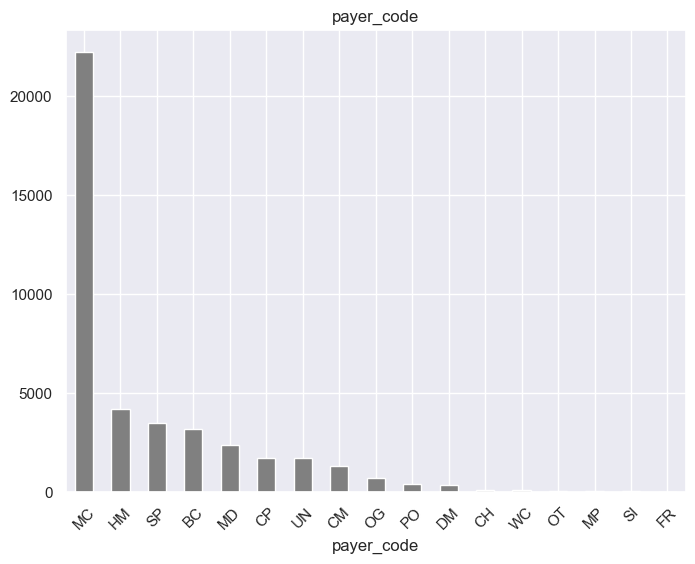

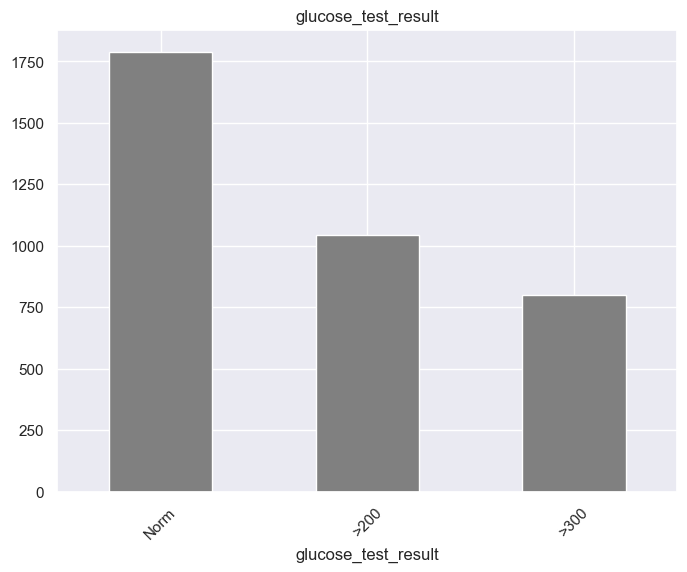

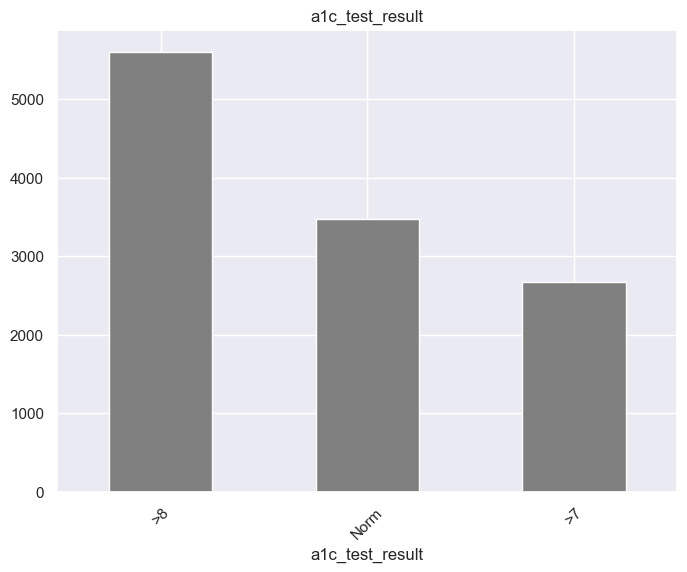

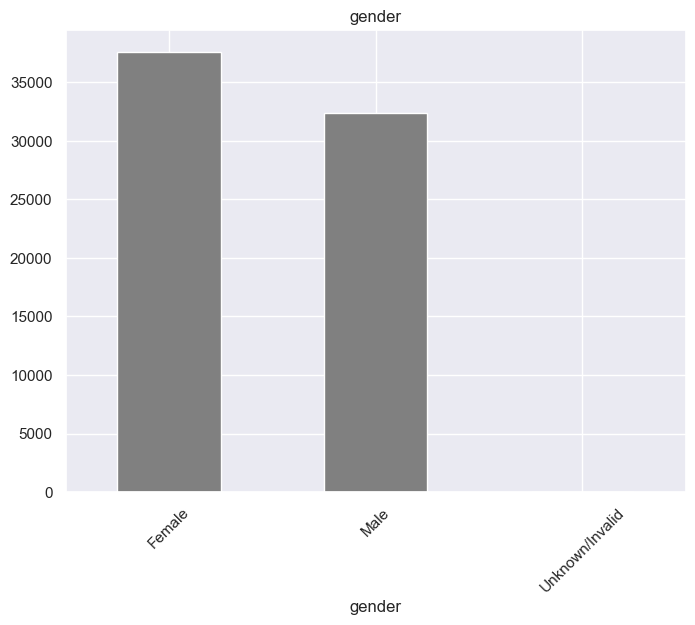

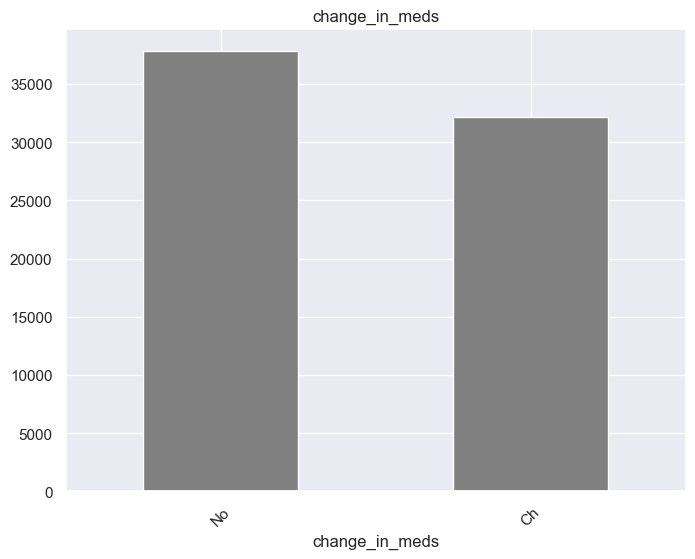

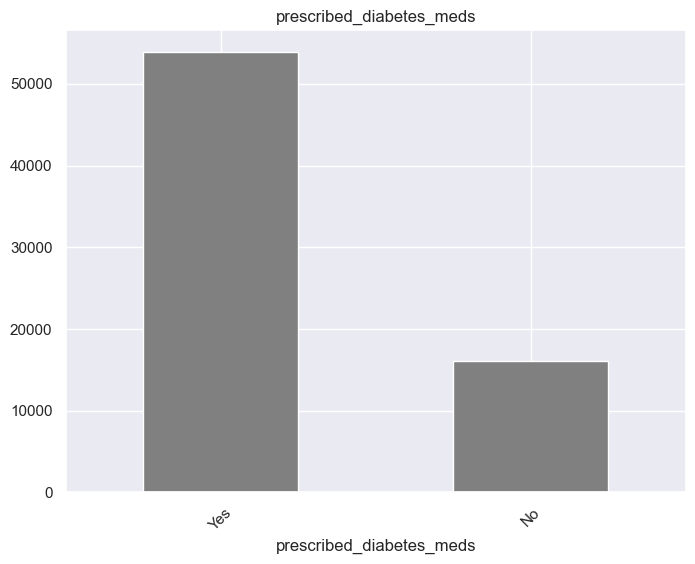

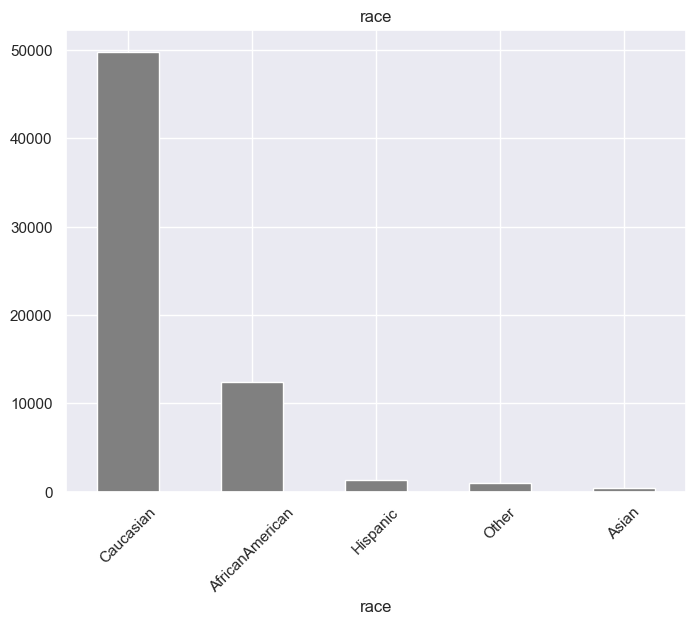

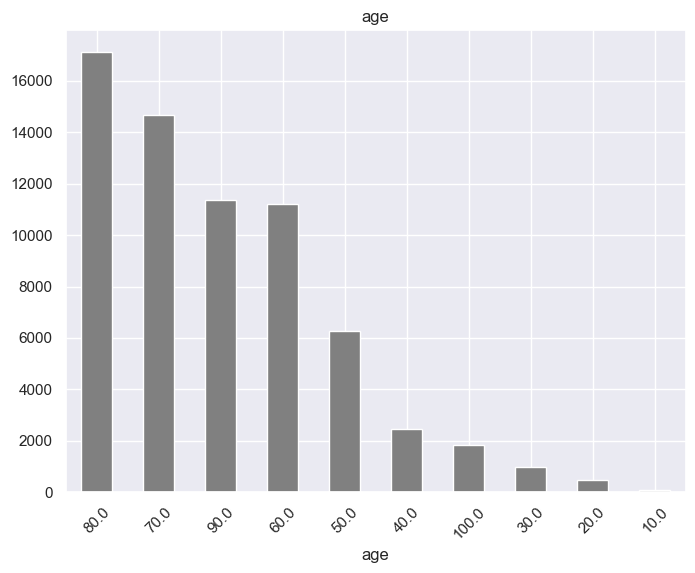

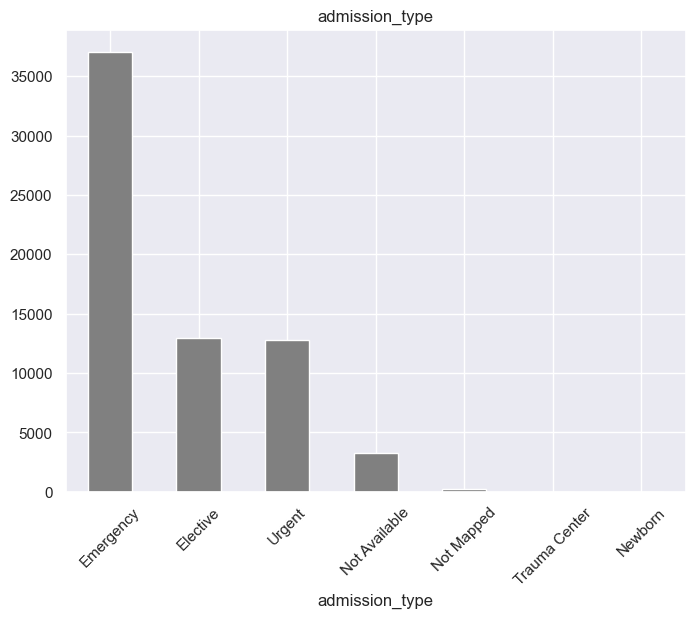

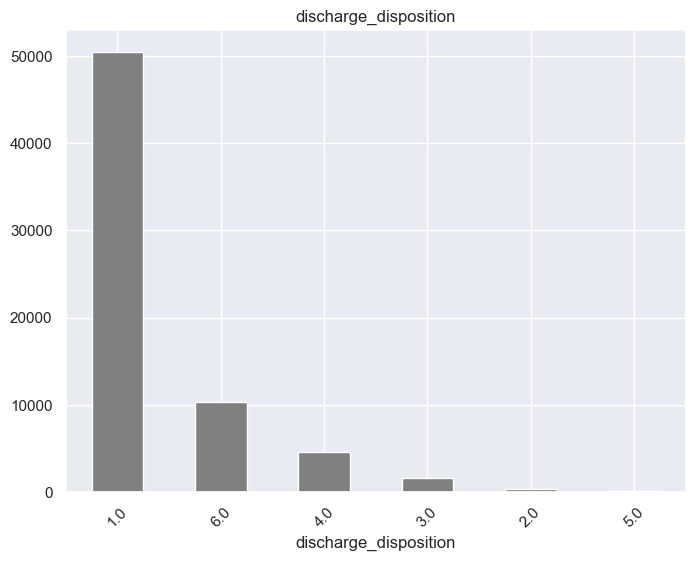

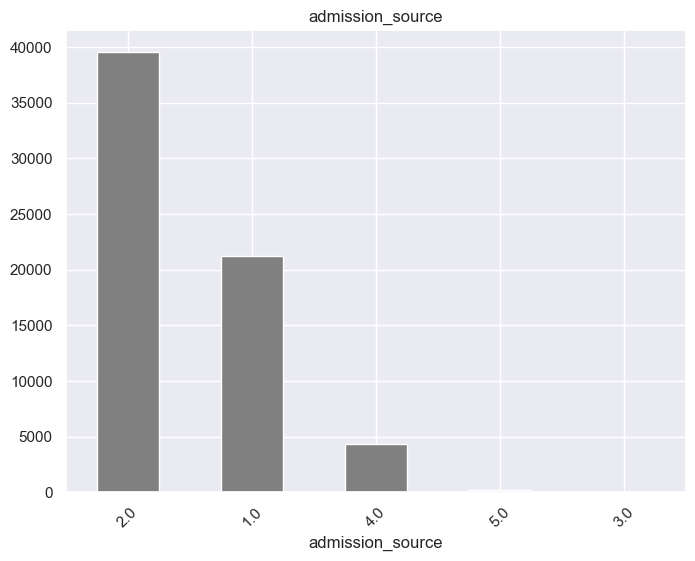

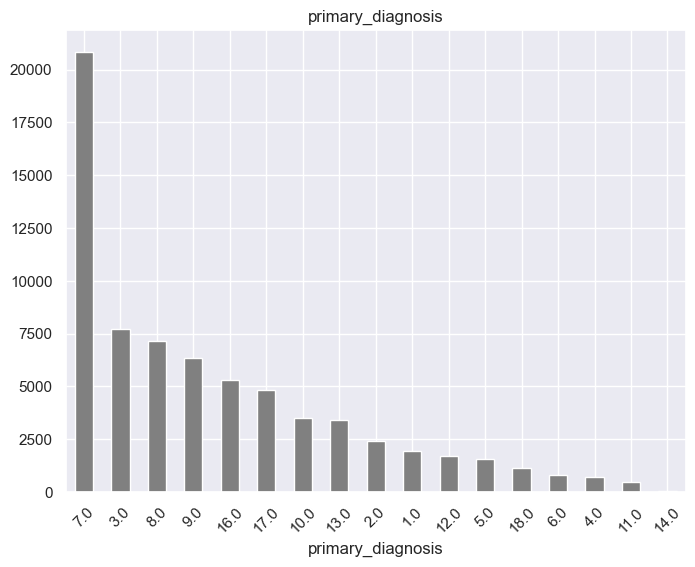

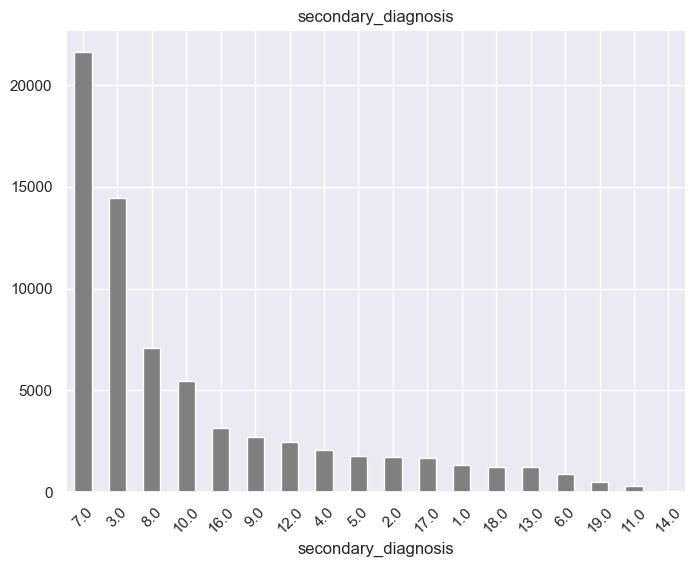

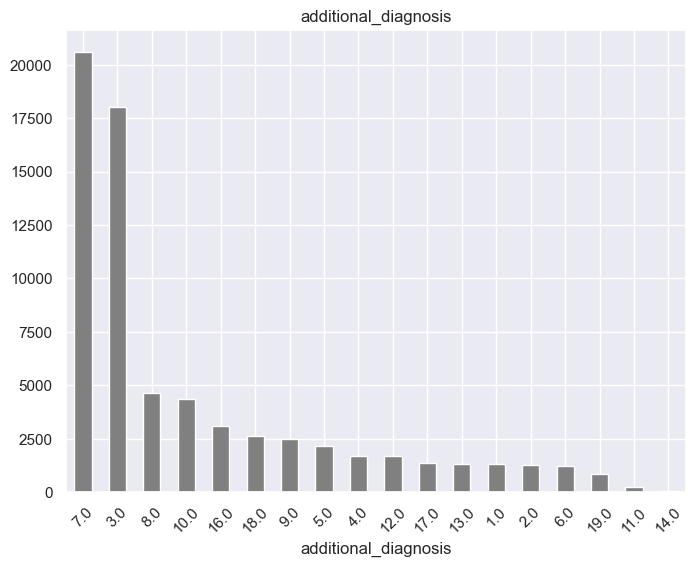

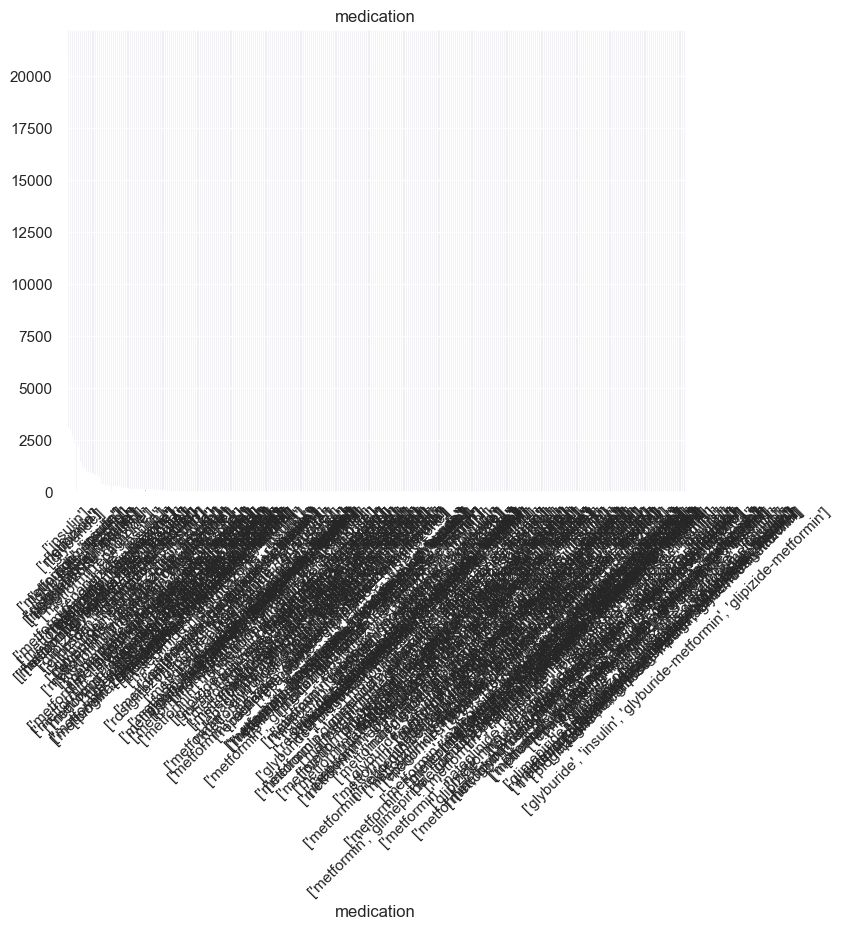

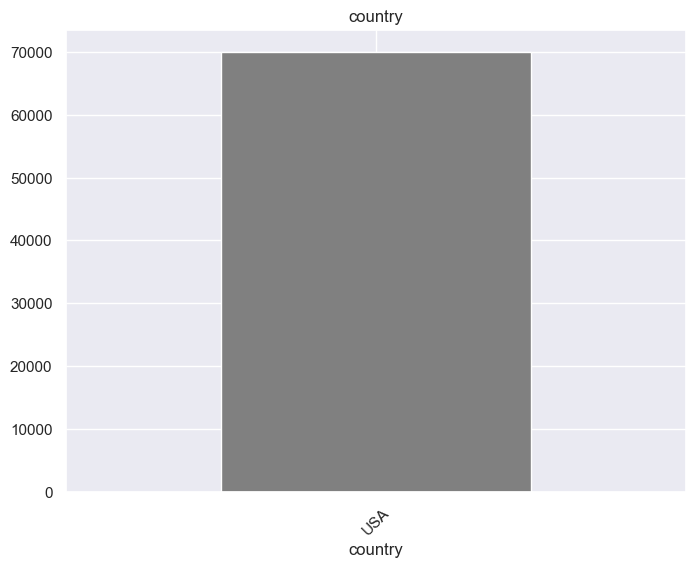

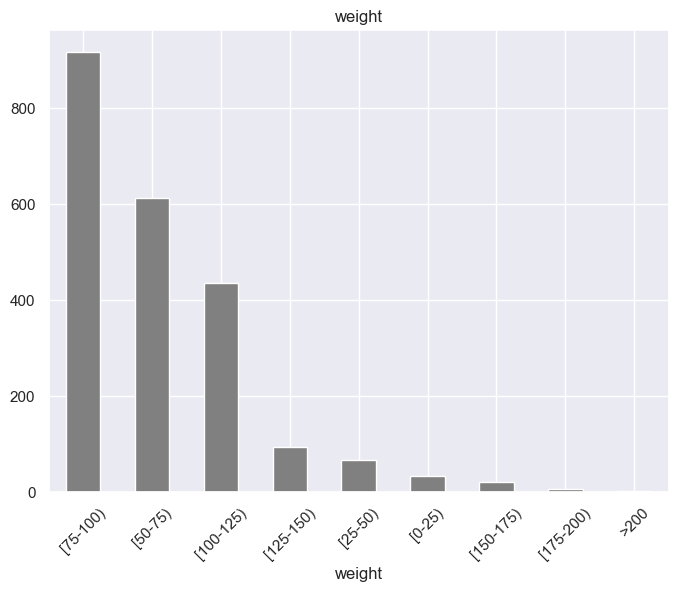

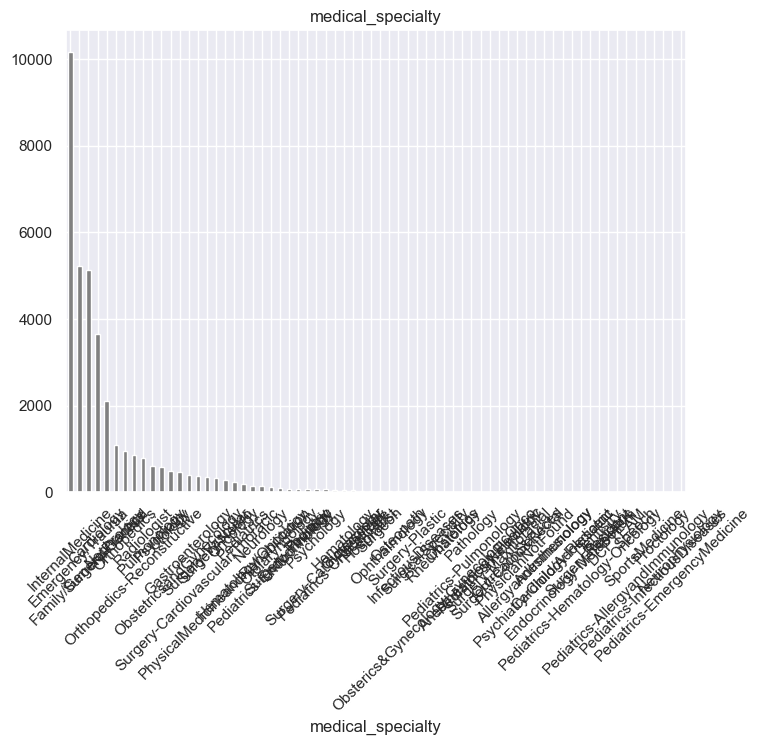

In [29]:
# Loop through each binary variable and create a separate bar plot
for feature in non_metric_feats:
    plt.figure(figsize=(8, 6))
    variable_counts = data[feature].value_counts()
    variable_counts.plot(kind='bar', color='gray')
    plt.title(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

<div class="alert alert-block alert-success">
<a class="anchor" id="seven-bullet">    

## 1.5. Missing values
 </a>
    
</div>

In [30]:
data.isna().sum()

country                         0
patient_id                      0
race                         4996
gender                          0
age                          3491
weight                      67791
payer_code                  27876
outpatient_visits               0
emergency_visits                0
inpatient_visits                0
admission_type               3644
medical_specialty           34273
discharge_disposition        2589
admission_source             4663
length_of_stay                  0
number_lab_tests                0
non_lab_procedures              0
number_of_medications           0
primary_diagnosis              16
secondary_diagnosis           261
additional_diagnosis          999
number_diagnoses                0
glucose_test_result         66344
a1c_test_result             58237
change_in_meds                  0
prescribed_diabetes_meds        0
medication                  16116
readmitted_binary               0
readmitted_multiclass           0
dtype: int64

In [31]:
# % of missing values
round((data.isna().sum())/len(data)*100, 2).sort_values(ascending=False)

weight                      96.87
glucose_test_result         94.81
a1c_test_result             83.22
medical_specialty           48.98
payer_code                  39.84
medication                  23.03
race                         7.14
admission_source             6.66
admission_type               5.21
age                          4.99
discharge_disposition        3.70
additional_diagnosis         1.43
secondary_diagnosis          0.37
primary_diagnosis            0.02
number_diagnoses             0.00
country                      0.00
prescribed_diabetes_meds     0.00
readmitted_binary            0.00
change_in_meds               0.00
length_of_stay               0.00
number_of_medications        0.00
non_lab_procedures           0.00
number_lab_tests             0.00
patient_id                   0.00
inpatient_visits             0.00
emergency_visits             0.00
outpatient_visits            0.00
gender                       0.00
readmitted_multiclass        0.00
dtype: float64

### Working on the results for Missing Values

In [20]:
# Drop weight since it has too many missing values
# Country has no missing values, but they're all the same, so don't add info to the model
# medical_specialty has 50% of missing values and imputing this values would cause bias to the models
data.drop(columns=['weight', 'country','medical_specialty'], inplace=True)

#remove this from non_metric_feats
non_metric_feats.remove('weight')
non_metric_feats.remove('country')
non_metric_feats.remove('medical_specialty')

In [21]:
# Let's assume missing values on glucose_test_result and a1c_test_result to be from people that didn't do the glucose exam
data['glucose_test_result'].fillna('None', inplace= True)
data['a1c_test_result'].fillna('None', inplace= True)

# Assume missing values on payer_code to be from people that don't have insurance
data['payer_code'].fillna('None', inplace= True)

# Let's assume missing values on medication to be from people that don't take any meds
data['medication'].fillna('No_meds', inplace= True)

In [22]:
# Through the feature 'number_diagnosis', some of the missing values on secondary_diagnosis and additional_diagnosis are actually empty values
# Example: if number_diagnosis=1, the patient only has 1 primary diagnosis

data['secondary_diagnosis'] = data['secondary_diagnosis'].fillna(data['number_diagnoses'].map({1:0}))

data['additional_diagnosis'] = data['additional_diagnosis'].fillna(data['number_diagnoses'].map({1:0, 2:0}))

In [23]:
data.isna().sum()

patient_id                     0
race                        4996
gender                         0
age                         3491
payer_code                     0
outpatient_visits              0
emergency_visits               0
inpatient_visits               0
admission_type              3644
discharge_disposition       2589
admission_source            4663
length_of_stay                 0
number_lab_tests               0
non_lab_procedures             0
number_of_medications          0
primary_diagnosis             16
secondary_diagnosis           98
additional_diagnosis         117
number_diagnoses               0
glucose_test_result            0
a1c_test_result                0
change_in_meds                 0
prescribed_diabetes_meds       0
medication                     0
readmitted_binary              0
readmitted_multiclass          0
dtype: int64

### Imputation of missing values

In [24]:
data_central = data.copy()

# Assuming non_metric_feats contains the names of your non-metric features
modes = data_central[non_metric_feats].mode().loc[0]

# Concatenate the modes into a DataFrame
missing_values = pd.DataFrame(modes, columns=['Mode'])

data_central.fillna(modes, inplace=True)

# Display the DataFrame after imputation
data = data_central.copy()


In [25]:
data.isna().sum()

patient_id                  0
race                        0
gender                      0
age                         0
payer_code                  0
outpatient_visits           0
emergency_visits            0
inpatient_visits            0
admission_type              0
discharge_disposition       0
admission_source            0
length_of_stay              0
number_lab_tests            0
non_lab_procedures          0
number_of_medications       0
primary_diagnosis           0
secondary_diagnosis         0
additional_diagnosis        0
number_diagnoses            0
glucose_test_result         0
a1c_test_result             0
change_in_meds              0
prescribed_diabetes_meds    0
medication                  0
readmitted_binary           0
readmitted_multiclass       0
dtype: int64

<div class="alert alert-block alert-success">
<a class="anchor" id="eight-bullet">    

## 1.6. Feature engineering
 </a>
    
</div>

In [26]:
# Create column with recurrency of patients
data['recurrency'] = data['patient_id'].duplicated(keep=False).astype(int)

In [27]:
# Patient Severity: Sum the number of diagnoses, lab tests, and non-lab procedures to create a composite severity score for each patient.
# Create a new column for the composite severity score
data['patient_severity_score'] = data['number_diagnoses'] + data['number_lab_tests'] + data['non_lab_procedures']

In [28]:
# Define a function to calculate the ratio of changes in medication to the total number of medications
def calculate_medication_change_ratio(row):
    total_medications = row['number_of_medications']
    medication_changes = row['change_in_meds']

    # Check if there is a change in medication
    if medication_changes == 'Ch':
        return 1.0 * total_medications  # You can adjust this multiplier based on your preference
    else:
        return 0.0

# Apply the function to create the new feature
data['medication_change_ratio'] = data.apply(calculate_medication_change_ratio, axis=1)


In [29]:
#Number of Prior Visits: Count the number of visits each patient has had before the current encounter.

# Reset the index to make 'encounter_id' a regular column
data = data.reset_index()

# Create column to count the number of visits each patient had before the current encounter
data['number_prior_visits'] = data.groupby('patient_id')['encounter_id'].transform('cumcount')

In [30]:
# Create a new column for the ratio of lab tests to medications
data['lab_tests_to_medications_ratio'] = data['number_lab_tests'] / data['number_of_medications']

In [31]:
'''
Age times medications:
create a new feature representing the product of age and the number of medications,
to capture a combined effect of a patient's age and the number of medications they are taking
'''
# Create a new age-related interaction feature
data['age_times_medications'] = data['age'] * data['number_of_medications']

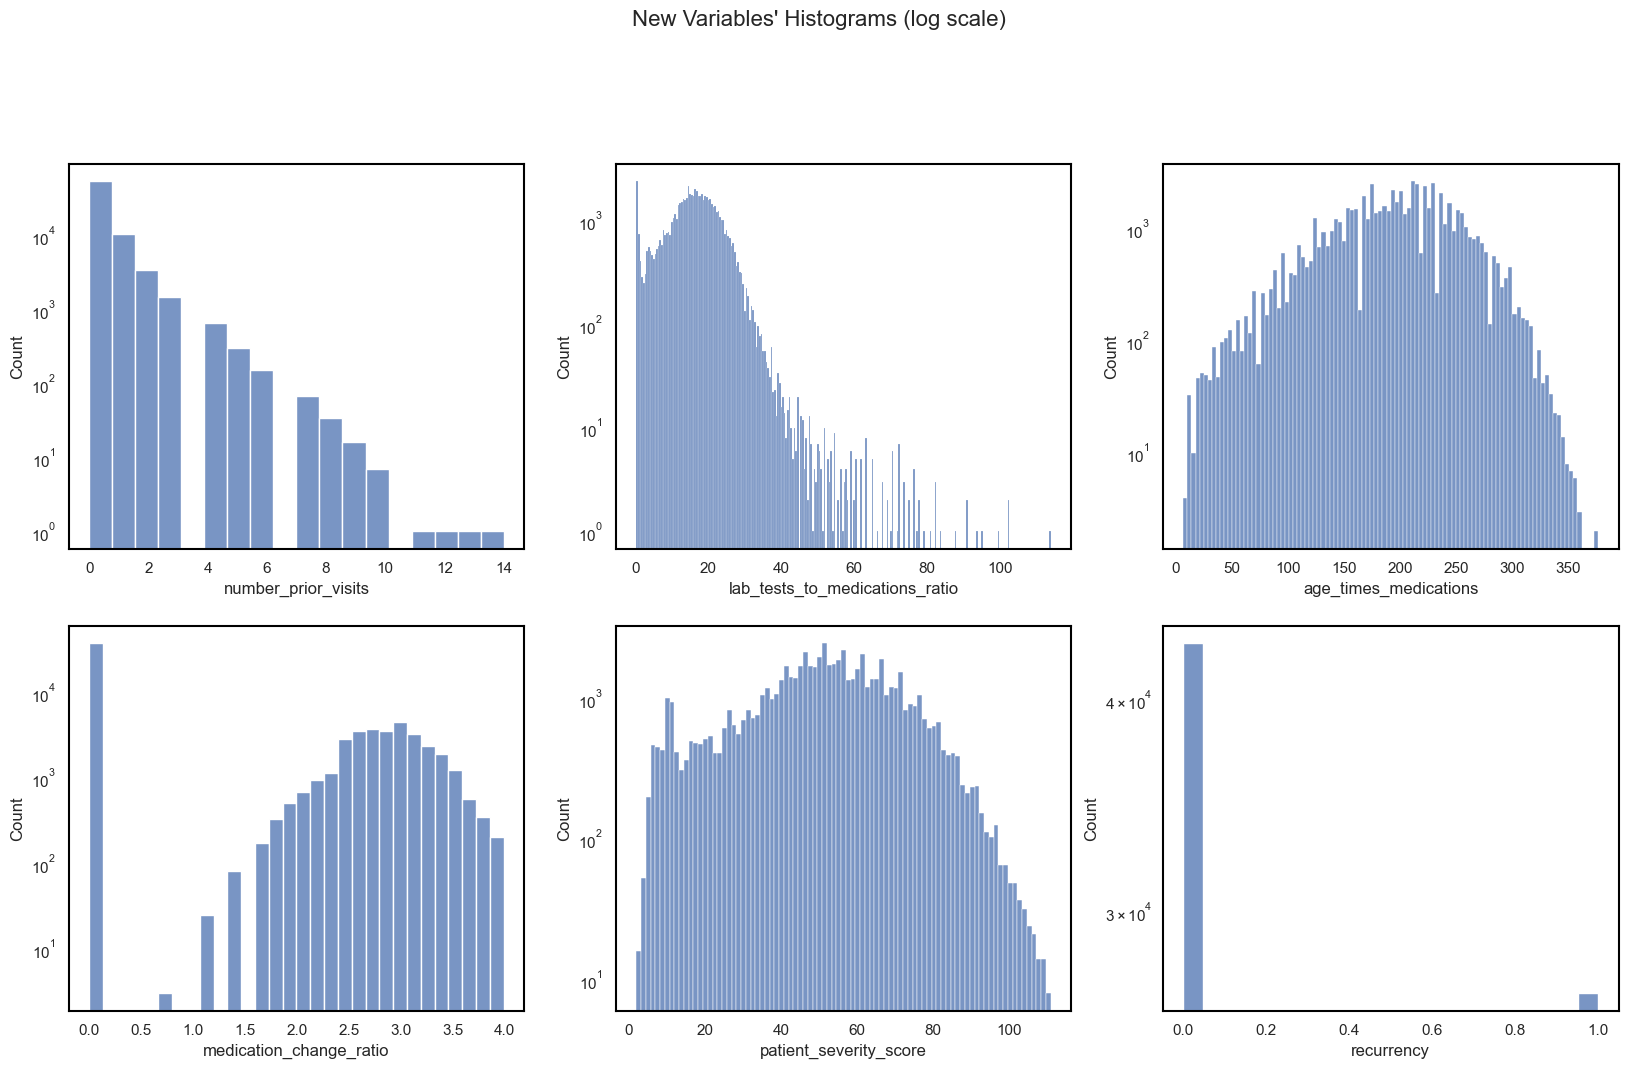

In [32]:
new_feats = ['number_prior_visits','lab_tests_to_medications_ratio', 'age_times_medications','medication_change_ratio',
'patient_severity_score','recurrency']

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(new_feats) / 2), figsize=(20, 11))
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
# Plot data
for ax, feat in zip(axes.flatten(), new_feats):
    sns.histplot(data=data, x=data[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis

# Layout
# Add a centered title to the figure
fig.suptitle("New Variables' Histograms (log scale)", fontsize=16, y=1.02)

plt.show()

### Transformation of new variables

In [33]:
#in the variables that have the distributions right skewed 
feats_to_log = ['number_prior_visits', 'lab_tests_to_medications_ratio']
# Log transformation of metric features
data[feats_to_log] = np.log1p(data[feats_to_log])

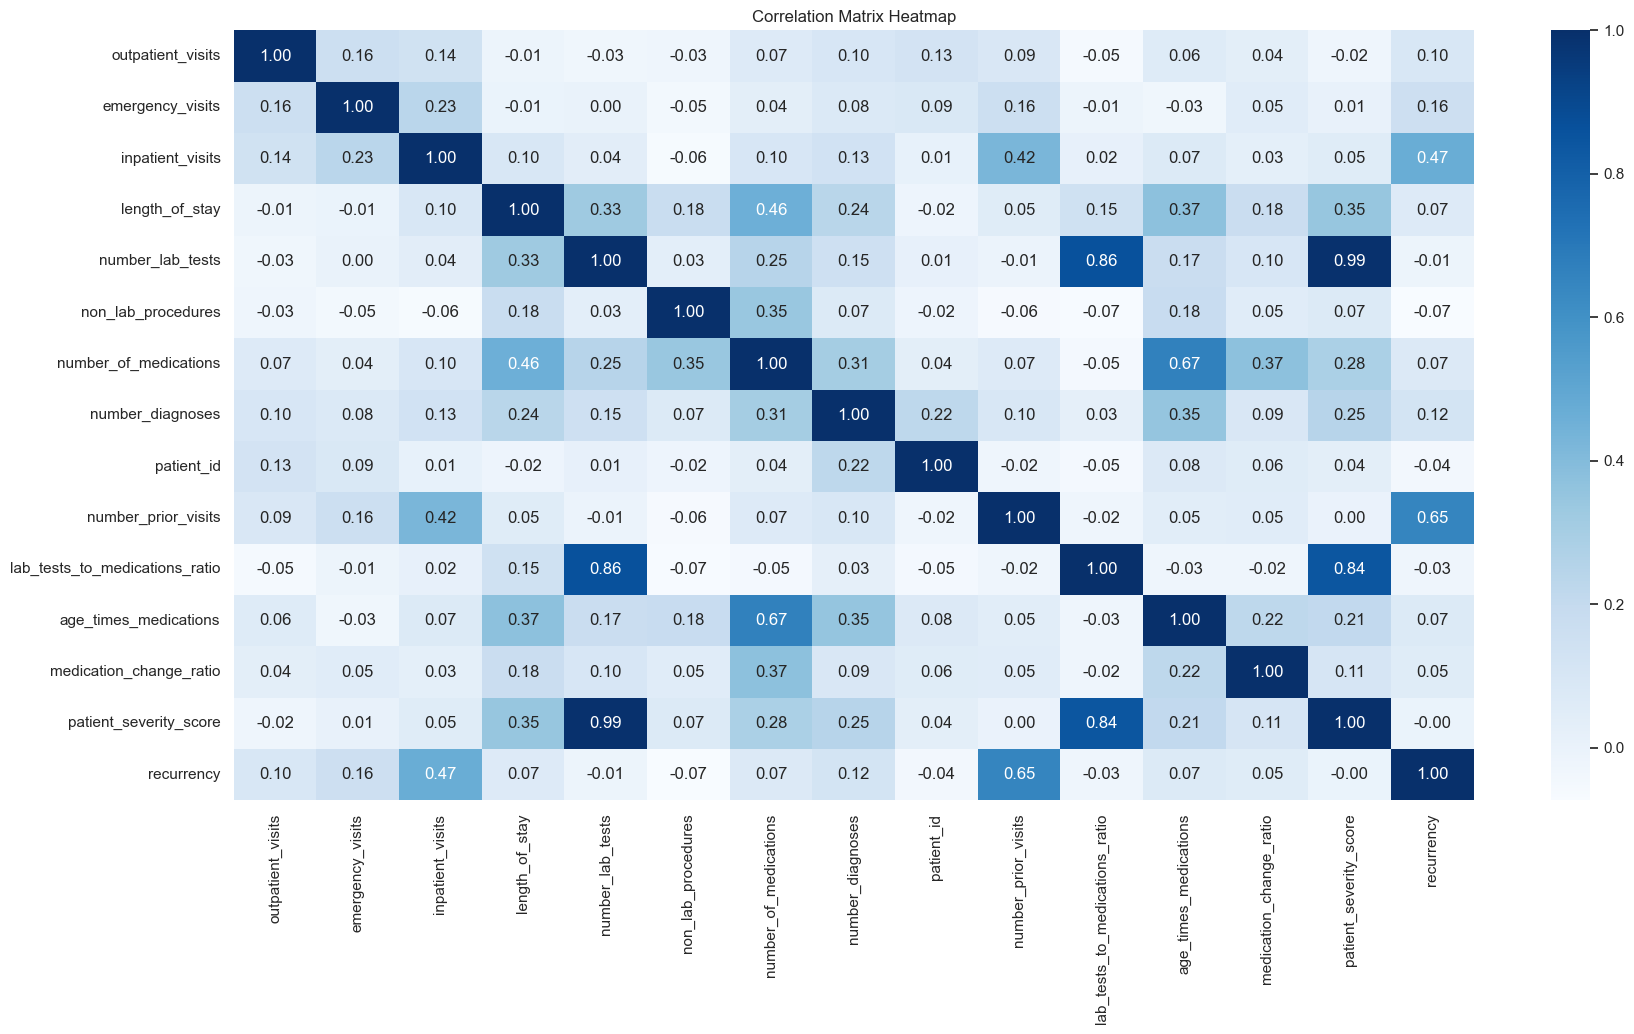

In [46]:
# Correlation Matrix
correlation_matrix = data[metric_feats+new_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69978 entries, 0 to 69977
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   encounter_id                    69978 non-null  int64  
 1   patient_id                      69978 non-null  int64  
 2   race                            69978 non-null  object 
 3   gender                          69978 non-null  object 
 4   age                             69978 non-null  float64
 5   payer_code                      69978 non-null  object 
 6   outpatient_visits               69978 non-null  float64
 7   emergency_visits                69978 non-null  float64
 8   inpatient_visits                69978 non-null  float64
 9   admission_type                  69978 non-null  object 
 10  discharge_disposition           69978 non-null  float64
 11  admission_source                69978 non-null  float64
 12  length_of_stay                  

In [34]:
# Updating metric features
metric_feats += ['number_prior_visits','lab_tests_to_medications_ratio', 'age_times_medications','medication_change_ratio',
'patient_severity_score','recurrency']

### Encoding categorical variables

In [35]:
# Creates a copy of the original data frame to apply scaling
data_scaled = data.copy()

v_to_encode = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 
               'admission_type', 'medication', 'readmitted_multiclass','readmitted_binary']

label_encoder = LabelEncoder()

for column in v_to_encode: 
    data[column] = label_encoder.fit_transform(data[column])

# Same for scaled data
for column in v_to_encode:
    data_scaled[column] = label_encoder.fit_transform(data_scaled[column])

In [36]:
# Create a RobustScaler instance
scaler = RobustScaler()

# Scale the entire data_scaled DataFrame
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)

In [37]:
data.set_index('encounter_id', inplace=True)

data_scaled.set_index('encounter_id', inplace=True)

<div class="alert alert-block alert-info">
<a class="anchor" id="nine-bullet">     

# 2. Feature selection
</a>    
</div>

The algorithm is Random Forest once that it is robust to overfiting and Decison Trees are more adequate to smaller datasets where overfting is not a concern

                           Feature  Importance
25                      recurrency    0.280184
28             number_prior_visits    0.113841
8                 inpatient_visits    0.073986
1                       patient_id    0.061841
10           discharge_disposition    0.041443
0                     encounter_id    0.041357
30           age_times_medications    0.037879
29  lab_tests_to_medications_ratio    0.034619
26          patient_severity_score    0.033024
13                number_lab_tests    0.027750
15           number_of_medications    0.025466
19                number_diagnoses    0.021419
16               primary_diagnosis    0.021290
24                      medication    0.020501
5                       payer_code    0.019841
12                  length_of_stay    0.018952
17             secondary_diagnosis    0.016041
18            additional_diagnosis    0.015894
27         medication_change_ratio    0.015479
14              non_lab_procedures    0.013255
4            

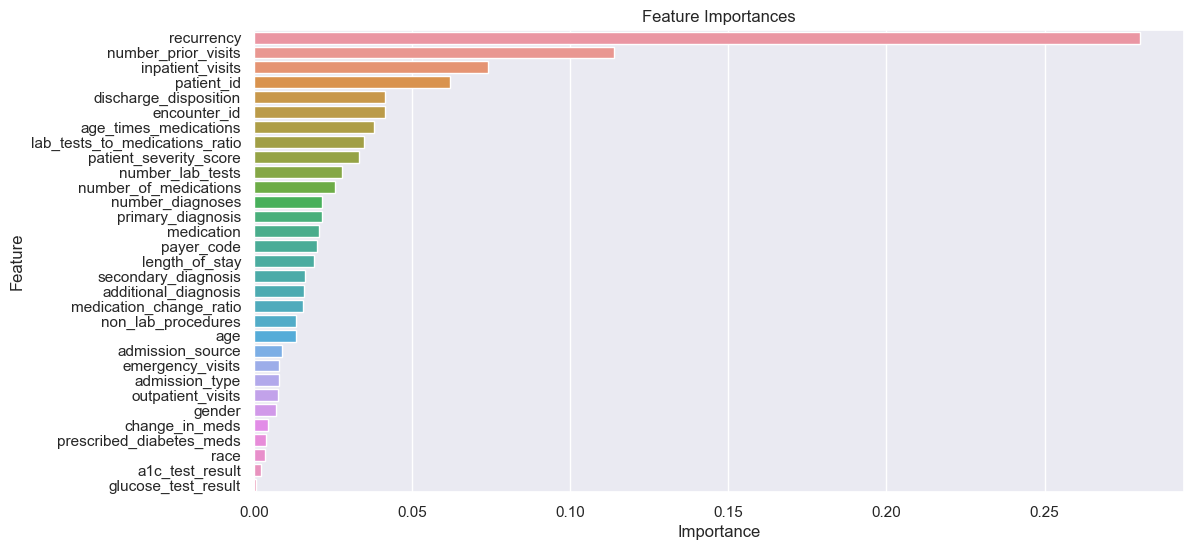

In [57]:
X_with_all_features = data.drop(columns=['readmitted_binary', 'readmitted_multiclass'])
y = data['readmitted_multiclass']
X_train, X_test, y_train, y_test = train_test_split(X_with_all_features, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state = 42,
                                                    stratify=y)


# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data using the sampler
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators= 200, criterion= 'entropy', max_depth=100, min_samples_leaf = 20, random_state=42)
clf.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances_rf = clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_rf = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_rf)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importances')
plt.show()


In [38]:
# Drop binary because this is multiclass 
# Drop patient_id because we have that information on 'recurrency'
data_scaled.drop(columns='patient_id', inplace=True)
data_scaled.drop(columns='readmitted_binary', inplace=True)

<div class="alert alert-block alert-success">
<a class="anchor" id="ten-bullet">    

## 2.1. Mutual information
 </a>
    
</div>

In [53]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1)  # Features
y = data_scaled['readmitted_multiclass']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

# Create a list of tuples containing feature names and their scores
feature_scores = list(zip(X_train.columns, mi_scores))

# Print the feature importance scores in descending order
print("Mutual Information Scores (Descending Order):")
for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")

# Use cross-validation to get a more robust estimate of the model's performance
classifier = RandomForestClassifier()  # Replace with your desired classifier
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Mutual Information Scores (Descending Order):
recurrency: 0.11912948278892288
number_prior_visits: 0.07095415470589783
inpatient_visits: 0.02815045065685262
discharge_disposition: 0.01613517087265892
medication: 0.010154151358074515
change_in_meds: 0.0075399720038211715
emergency_visits: 0.00699747021548891
number_diagnoses: 0.0054045598769920655
admission_source: 0.005094164126925982
non_lab_procedures: 0.004975348211518904
number_of_medications: 0.0043824386851532005
age_times_medications: 0.004302871461399738
payer_code: 0.0036489219333215583
lab_tests_to_medications_ratio: 0.0034930837366036194
medication_change_ratio: 0.0032509269781499928
age: 0.0031119641467365344
outpatient_visits: 0.002971463795116147
gender: 0.002937359102042958
primary_diagnosis: 0.002642127556886198
patient_severity_score: 0.002282791521005745
number_lab_tests: 0.0017142735857187397
prescribed_diabetes_meds: 0.0016657392875776278
length_of_stay: 0.0015098917812386148
admission_type: 0.0008393101290105065
gl

<div class="alert alert-block alert-success">
<a class="anchor" id="eleven-bullet">    

## 2.2. Boruta
 </a>
    
</div>

In [63]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Initialize Boruta
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', verbose=2, random_state=42)

# Fit Boruta on the data
boruta_selector.fit(X, y)

# Zip names, ranks, and decisions into a single iterable
feature_ranks = list(zip(data_scaled.drop(columns='readmitted_multiclass').columns,
                         boruta_selector.ranking_,
                         boruta_selector.support_))

# Sort by ranking
feature_ranks_sorted = sorted(feature_ranks, key=lambda x: x[1])

# Iterate through and print out the results
for feat in feature_ranks_sorted:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))



Cross-Validation Scores:
[0.66104601 0.66883395 0.67390683 0.67809932 0.67738478]
Mean CV Score: 0.6718541795384605
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	28
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	28


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	28
Feature: recurrency                Rank: 1,  Keep: True
Feature: lab_tests_to_medications_ratio Rank: 2,  Keep: False
Feature: age_times_medications     Rank: 3,  Keep: False
Feature: patient_severity_score    Rank: 4,  Keep: False


<div class="alert alert-block alert-success">
<a class="anchor" id="twelve-bullet">    

## 2.3. Ridge Regression
 </a>
    
</div>

In [64]:
# Separate features (X) and target variable (y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

alpha_values = [0.1, 1, 10, 100]
parameters = {'alpha': alpha_values}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

coefficients = final_ridge_model.coef_

y_pred = final_ridge_model.predict(X_val)

coefficients

# Zip names, ranks, and decisions into a single iterable
feature_ranks = list(zip(data_scaled.drop(columns='readmitted_multiclass').columns, coefficients))

# Sort the feature ranks by coefficients in descending order
sorted_feature_ranks = sorted(feature_ranks, key=lambda x: abs(x[1]), reverse=True)

# Iterate through and print out the sorted results
for feat in sorted_feature_ranks:
    print('Feature: {:<25} Coef: {}'.format(feat[0], feat[1]))

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(final_ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Feature: recurrency                Coef: -0.5314086999913719
Feature: number_prior_visits       Coef: -0.13250532998632208
Feature: emergency_visits          Coef: -0.07197265027765135
Feature: prescribed_diabetes_meds  Coef: -0.06052536904011791
Feature: outpatient_visits         Coef: -0.05930500557385217
Feature: age_times_medications     Coef: 0.04281598027717593
Feature: age                       Coef: -0.039573677206123974
Feature: number_diagnoses          Coef: -0.035295881121558216
Feature: number_of_medications     Coef: -0.03404308267890428
Feature: medication_change_ratio   Coef: 0.03398531157790734
Feature: payer_code                Coef: -0.0216312283735196
Feature: patient_severity_score    Coef: -0.021505928240325323
Feature: change_in_meds            Coef: 0.0184892207649221
Feature: number_lab_tests          Coef: -0.018127769379271453
Feature: non_lab_procedures        Coef: 0.016434836159972186
Feature: admission_source          Coef: 0.016199205448930172
Feature: g

<div class="alert alert-block alert-success">
<a class="anchor" id="13-bullet">    

## 2.4. RFE
 </a>
    
</div>

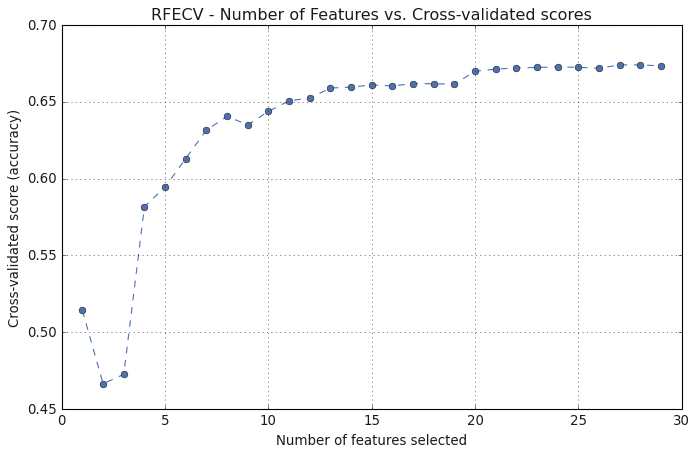

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5)

# Fit RFECV
rfecv.fit(X_train, y_train)

# Plot number of features vs. cross-validated scores
plt.style.use('classic')
plt.figure(figsize=(10, 6), facecolor='white')
plt.title('RFECV - Number of Features vs. Cross-validated scores')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validated score (accuracy)')
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], marker='o', linestyle='--', color='b')
plt.grid(True)
# Set the frame color to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

In [66]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Initialize RFE with the Random Forest model and the number of features to select
rfe = RFE(estimator=rf_classifier)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rfe, X, y, cv=5, scoring='accuracy') 

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Fit RFE to the data
rfe.fit(X, y)

# Create a DataFrame with features, ranking, and support
feature_ranks_df = pd.DataFrame({'Feature': data_scaled.drop('readmitted_multiclass', axis=1).columns,
                                  'Ranking': rfe.ranking_,
                                  'Support': rfe.support_})

# Sort the DataFrame by ranking
sorted_feature_ranks_df = feature_ranks_df.sort_values(by='Ranking')

# Print the selected features and their ranking
print("\nSelected Features with Ranking:")
print(sorted_feature_ranks_df[['Feature', 'Ranking']])



Cross-Validation Scores:
[0.6481852  0.65640183 0.65940269 0.65937835 0.65709182]
Mean CV Score: 0.6560919758526425

Selected Features with Ranking:
                           Feature  Ranking
14               primary_diagnosis        1
25         medication_change_ratio        1
24          patient_severity_score        1
23                      recurrency        1
22                      medication        1
16            additional_diagnosis        1
15             secondary_diagnosis        1
27  lab_tests_to_medications_ratio        1
13           number_of_medications        1
12              non_lab_procedures        1
11                number_lab_tests        1
28           age_times_medications        1
3                       payer_code        1
10                  length_of_stay        1
17                number_diagnoses        2
26             number_prior_visits        3
6                 inpatient_visits        4
2                              age        5
7             

<div class="alert alert-block alert-success">
<a class="anchor" id="14-bullet">    

## 2.5. Select K Best
 </a>
    
</div>

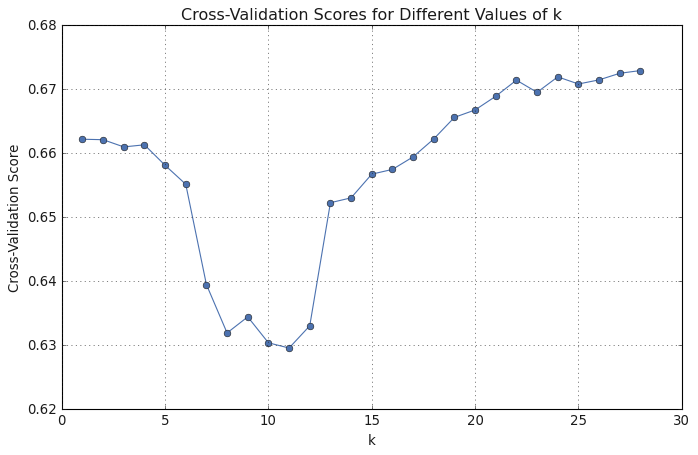

Best k: 28
Best Score: 0.6728830827079568


In [56]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Create a pipeline with SelectKBest and a classifier
def create_pipeline(k):
    if k == 'all':
        return make_pipeline(SelectKBest(f_classif, k=k), RandomForestClassifier(random_state=42))
    else:
        return make_pipeline(SelectKBest(f_classif, k=min(k, X.shape[1])), RandomForestClassifier(random_state=42))

# Choose a range of k values to try
k_values = [i for i in range(1, min(X.shape[1], 29))]  # Adjusted the range

# Perform cross-validation for each k
cv_scores = []
for k in k_values:
    pipeline = create_pipeline(k)
    scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Plot the scores for different k values
plt.style.use('classic')
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Scores for Different Values of k')
plt.xlabel('k')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
# Set the frame color to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

# Find the k that results in the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)
print("Best k:", best_k)
print("Best Score:", best_score)

In [72]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Create the final pipeline with the best k
final_pipeline = create_pipeline(19)

# Fit the final pipeline on the entire dataset
final_pipeline.fit(X, y)

# Get the selected features
k_best = final_pipeline.named_steps['selectkbest']
selected_features = data_scaled.drop('readmitted_multiclass', axis=1).columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Define the classifier
clf = final_pipeline.named_steps['randomforestclassifier']

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(final_pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Selected Features: Index(['age', 'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'discharge_disposition', 'admission_source', 'length_of_stay',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses', 'change_in_meds', 'prescribed_diabetes_meds',
       'medication', 'recurrency', 'patient_severity_score',
       'medication_change_ratio', 'number_prior_visits',
       'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.65132895 0.66504716 0.66976279 0.67202572 0.66966774]
Mean Accuracy: 0.6655664717556723


In [74]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Create the final pipeline with the best k
final_pipeline = create_pipeline(28)

# Fit the final pipeline on the entire dataset
final_pipeline.fit(X, y)

# Get the selected features
k_best = final_pipeline.named_steps['selectkbest']
selected_features = data_scaled.drop('readmitted_multiclass', axis=1).columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Define the classifier
clf = final_pipeline.named_steps['randomforestclassifier']

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(final_pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Selected Features: Index(['gender', 'age', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'discharge_disposition',
       'admission_source', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result', 'change_in_meds',
       'prescribed_diabetes_meds', 'medication', 'recurrency',
       'patient_severity_score', 'medication_change_ratio',
       'number_prior_visits', 'lab_tests_to_medications_ratio',
       'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.65911689 0.6691912  0.67797942 0.67967131 0.67845659]
Mean Accuracy: 0.6728830827079568


<div class="alert alert-block alert-success">
<a class="anchor" id="16-bullet">    

## 2.6. LASSO Regression
 </a>
    
</div>

Cross-Validation Scores: [-0.3664165  -0.37081569 -0.36730336 -0.36595072 -0.36056082 -0.35541001
 -0.36406093 -0.3602085  -0.36938684 -0.36040892]
Mean Negative MSE: -0.36405222957668115
Lasso picked 18 variables and eliminated the other 11 variables
recurrency                       -0.532193
number_prior_visits              -0.129263
emergency_visits                 -0.066272
outpatient_visits                -0.050593
prescribed_diabetes_meds         -0.049336
number_diagnoses                 -0.033760
patient_severity_score           -0.027504
payer_code                       -0.020717
race                             -0.015008
age                              -0.011322
length_of_stay                   -0.006761
number_of_medications            -0.005278
discharge_disposition            -0.001836
medication_change_ratio          -0.000000
medication                        0.000000
change_in_meds                    0.000000
a1c_test_result                  -0.000000
glucose_test_resu

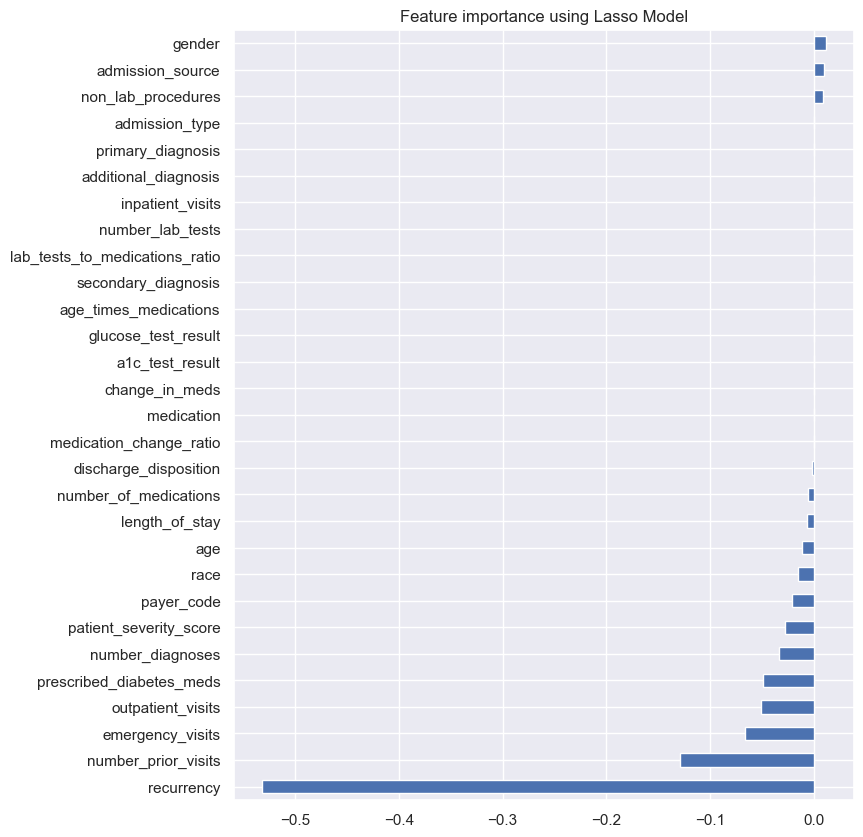

Top features and their coefficients:
recurrency                        0.532193
number_prior_visits               0.129263
emergency_visits                  0.066272
outpatient_visits                 0.050593
prescribed_diabetes_meds          0.049336
number_diagnoses                  0.033760
patient_severity_score            0.027504
payer_code                        0.020717
race                              0.015008
gender                            0.011394
age                               0.011322
admission_source                  0.010301
non_lab_procedures                0.008958
length_of_stay                    0.006761
number_of_medications             0.005278
discharge_disposition             0.001836
admission_type                    0.000050
primary_diagnosis                 0.000026
glucose_test_result               0.000000
a1c_test_result                   0.000000
change_in_meds                    0.000000
additional_diagnosis              0.000000
medication       

In [69]:
# Separate features (X) and target variable (y)
X = data_scaled.drop('readmitted_multiclass', axis=1).values  # Features
y = data_scaled['readmitted_multiclass'].values  # Target variable

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

# Fitting LassoCV model with cross-validation
reg = LassoCV(cv=10, random_state=0)
reg.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Negative MSE:", cv_scores.mean())

# Extracting feature importances
coef = pd.Series(reg.coef_, index=data_scaled.drop('readmitted_multiclass', axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
print(coef.sort_values())

# Plot
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

plot_importance(coef, 'Lasso')

# Features with higher absolute coefficients are considered more influential according to the Lasso regression
# Sort features by absolute coefficient values
coef_abs_sorted = coef.abs().sort_values(ascending=False)

# Display sorted features and their coefficients
print("Top features and their coefficients:")
print(coef_abs_sorted)

<hr>

### Numerical Data

| Predictor |  RFE CV| SelectKBest | Lasso | What to do? (One possible way to "solve") | 
| --- |  --- | --- |--- |---|
| race | Discard | Keep | Discard | Discard |
| gender | Discard | Keep | Discard | Discard |
| age | Keep | Discard | Discard | Discard |
| outpatient_visits |  Discard | Keep | Keep | Keep |
| emergency_visits |  Discard | Keep | Keep | Keep |
| inpatient_visits | Keep | Keep | Keep | Keep |
| admission_type | Discard | Discard | Discard | Discard |
| average_pulse_bpm | Keep | Discard | Discard | Discard |
| discharge_disposition | Discard | Keep | Keep? | Discard |
| admission_source | Discard | Keep | Discard | Discard |
| length_of_stay | Keep | Keep | Keep | Keep |
| number_lab_tests | Keep | Keep | Keep | Keep |
| non_lab_procedures | Discard | Keep | Keep? | Discard |
| number_of_medications | Keep | Keep | Keep | Keep |
| primary_diagnosis | Keep | Discard | Discard | Discard |
| secondary_diagnosis | Keep | Keep | Discard | Discard |
| additional_diagnosis | Keep | Keep | Keep | Keep |
| number_diagnoses | Keep | Keep | Keep | Keep |
| change_in_meds | Discard | Discard | Discard | Discard |
| prescribed_diabetes_meds | Discard | Discard | Keep | Discard |
| medication | Keep | Keep | Discard | Keep |
| payer_code | Keep | Discard | Discard | Discard |
| medical_specialty | Keep | Keep | Keep | Keep |

<hr>



<div class="alert alert-block alert-info">
<a class="anchor" id="17-bullet">     

# 3. Model testing
</a>    
</div>

In [39]:
feats_to_model = ['medication_change_ratio', 'patient_severity_score', 'recurrency', 'medication', 'number_of_medications', 
                  'non_lab_procedures', 'number_lab_tests', 'age_times_medications', 'length_of_stay', 'number_diagnoses',
                  'number_prior_visits', 'inpatient_visits', 'age', 'discharge_disposition', 'admission_source', 
                  'emergency_visits', 'outpatient_visits', 'lab_tests_to_medications_ratio', 'secondary_diagnosis']

X_selected = data[feats_to_model]

y = data['readmitted_multiclass']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.2, random_state = 42, stratify=y)

In [40]:
feats_to_model = ['medication_change_ratio', 'patient_severity_score', 'recurrency', 'medication', 'number_of_medications', 
                  'non_lab_procedures', 'number_lab_tests', 'age_times_medications', 'length_of_stay', 'number_diagnoses',
                  'number_prior_visits', 'inpatient_visits', 'age', 'discharge_disposition', 'admission_source', 
                  'emergency_visits', 'outpatient_visits', 'lab_tests_to_medications_ratio', 'secondary_diagnosis']

X_selected_scaled = data_scaled[feats_to_model]

y_scaled = data_scaled['readmitted_multiclass']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_selected_scaled, y_scaled,test_size=0.2, random_state = 42, stratify=y)

### Samplers

In [41]:
# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data using the sampler
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [42]:
# Create an instance of RandomUnderSampler
rus_scaled = RandomUnderSampler(random_state=42)

# Fit and transform the training data using the sampler
X_resampled_scaled, y_resampled_scaled = rus_scaled.fit_resample(X_train_scaled, y_train_scaled)

<div class="alert alert-block alert-success">
<a class="anchor" id="18-bullet">    

## 3.1. Decision Tree
 </a>
    
</div>

DT - Grid Search

In [69]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 50, 100, 150],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best model
best_dt_model = grid_search.best_estimator_

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'splitter': 'random'}


DT - GS_Parameters_k-fold + Stratified K-fold scores

In [80]:
# Create and train a Decision Tree model
dt_model_CV = DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=10, min_samples_leaf=20, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_model_CV, X_resampled, y_resampled, cv=10, scoring='accuracy')

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(dt_model_CV, X_resampled, y_resampled, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy(CV):", cv_scores.mean())

# Fit the model on the entire training set
dt_model_CV.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = dt_model_CV.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=np.unique(y_test))
cm = confusion_matrix(y_test, y_pred)

print("Decision Tree - Classification Report:\n", report)
print("Decision Tree - Confusion Matrix:\n", cm)
print("Accuracy on test data:", accuracy)
print("Accuracy on Resampled Data:", dt_model_CV.score(X_resampled, y_resampled))

Stratified Cross-Validation Scores: [0.5248227  0.5259138  0.51336607 0.50081833 0.52973268 0.52864157
 0.4964539  0.51746725 0.52947598 0.5169214 ]
Mean Accuracy (Stratified CV): 0.5183613674101921
Cross-Validation Scores: [0.50954719 0.52045827 0.52209493 0.52700491 0.51336607 0.50081833
 0.51282051 0.52019651 0.54257642 0.52183406]
Mean Accuracy(CV): 0.5190717188754447
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.49      0.28      1527
           1       0.53      0.30      0.38      4871
           2       0.75      0.73      0.74      7598

    accuracy                           0.55     13996
   macro avg       0.49      0.51      0.47     13996
weighted avg       0.61      0.55      0.56     13996

Decision Tree - Confusion Matrix:
 [[ 753  422  352]
 [1954 1446 1471]
 [1200  856 5542]]
Accuracy on test data: 0.5530865961703344
Accuracy on Resampled Data: 0.5651224968625526


<div class="alert alert-block alert-success">
<a class="anchor" id="19-bullet">    

## 3.2. Random Forest
 </a>
    
</div>

RF - Grid Search

In [71]:
# Define the hyperparameter grid
param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 5, 7, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 150}


RF - GS_Parameters - Stratified K-fold

In [75]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=150,
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    max_features=None,
    random_state=42
)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

Stratified Cross-Validation Scores: [0.53737043 0.54664484 0.52755046 0.51009274 0.53082379 0.53027823
 0.52373159 0.52947598 0.54093886 0.53275109]
Mean Accuracy (Stratified CV): 0.5309658028335441
Random Forest - Accuracy: 0.590597313518148
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.48      0.30      1527
           1       0.56      0.36      0.44      4871
           2       0.76      0.76      0.76      7598

    accuracy                           0.59     13996
   macro avg       0.51      0.53      0.50     13996
weighted avg       0.63      0.59      0.60     13996

Random Forest - Confusion Matrix:
 [[ 726  448  353]
 [1633 1769 1469]
 [ 885  942 5771]]


In [76]:
print("Accuracy on Resampled Data:", rf_model.score(X_resampled, y_resampled))

Accuracy on Resampled Data: 0.6717411469416708


<div class="alert alert-block alert-success">
<a class="anchor" id="20-bullet">    

## 3.3. AdaBoost
 </a>
    
</div>

AdaBoost - Grid Search + GS_Parameters_K_fold + Stratified K_fold scores

In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 150],
    'learning_rate': [0.01, 0.5, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3],
    'algorithm': ['SAMME', 'SAMME.R'],  
    'random_state': [None], 
    }

# Create an AdaBoost model
ada_model_GS = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_model_GS, param_grid, cv=10, scoring='accuracy')

# Perform the grid search on the resampled data
grid_search.fit(X_resampled, y_resampled)

# Access the best model
best_ada_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_ada_model.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(best_ada_model, X_resampled, y_resampled, cv=10, scoring='accuracy') 

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(best_ada_model, X_resampled, y_resampled, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=None)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy on Resampled Data:", best_ada_model.score(X_resampled, y_resampled))
print("Accuracy on Testing Data:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 150, 'random_state': None}
Stratified Cross-Validation Scores: [0.53900709 0.533006   0.55210038 0.52536825 0.54173486 0.53737043
 0.53082379 0.5360262  0.53984716 0.53329694]
Mean Accuracy (Stratified CV): 0.536858110764085
Cross-Validation Scores: [0.53573377 0.53082379 0.53955265 0.54446263 0.53627932 0.52973268
 0.53082379 0.53220524 0.5360262  0.52456332]
Mean Accuracy: 0.5340203379574373
Accuracy on Resampled Data: 0.5442243684181808
Accuracy on Testing Data: 0.5970277222063447
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.48      0.30      1527
           1       0.59      0.32      0.42      4871
           2       0.75      0.80      0.77      7598

    accuracy                           0.60     13996
   macro avg       0.52      0.53      0.50     13996
weighted avg       0.64      0.60      0.60 

<div class="alert alert-block alert-success">
<a class="anchor" id="21-bullet">    

## 3.4. Neural Network
 </a>
    
</div>

In [74]:
# Split your data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled_scaled, y_resampled_scaled, test_size=0.2, random_state=42)

nn_model = MLPClassifier(random_state=42)#MLPs can automatically learn hierarchical representations of the input data, capturing important features, however may be prone to overfiting

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [50, 200, 500, 1000],
}

# Create GridSearchCV object
grid_search = GridSearchCV(nn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Get the best model
best_nn_model = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_nn_model, X_val, y_val, cv=10, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (CV):", cv_scores.mean())

# Fit the best model on the entire training set
best_nn_model.fit(X_resampled_scaled, y_resampled_scaled)

# Make predictions on the testing data
y_pred = best_nn_model.predict(X_test)

# Convert labels to strings if they are not already
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Evaluate the model performance
accuracy = accuracy_score(y_test_str, y_pred_str)
report = classification_report(y_test_str, y_pred_str, labels=np.unique(y_test_str))
cm = confusion_matrix(y_test_str, y_pred_str)

# Print the classification report and confusion matrix
print("Neural Network - Accuracy:", accuracy)
print("Neural Network - Classification Report:\n", report)
print("Neural Network - Confusion Matrix:\n", cm)

C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best Parameters:  {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'lbfgs'}
Best Accuracy: 53.27%


C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lb

Cross-Validation Scores: [0.5013624  0.46321526 0.46049046 0.49591281 0.51771117 0.46866485
 0.44262295 0.48360656 0.43989071 0.43989071]
Mean Accuracy (CV): 0.4713367877190632


C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` 

Neural Network - Accuracy: 0.0
Neural Network - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    1527.0
           1       0.00      0.00      0.00    4871.0
           2       0.00      0.00      0.00    7598.0

   micro avg       0.00      0.00      0.00   13996.0
   macro avg       0.00      0.00      0.00   13996.0
weighted avg       0.00      0.00      0.00   13996.0

Neural Network - Confusion Matrix:
 [[   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [  22  608    0  897    0    0]
 [   0    0    0    0    0    0]
 [ 113 1753    0 3005    0    0]
 [ 167 2183    0 5248    0    0]]


C:\Users\mafal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
print("Accuracy on Resampled Data:", best_nn_model.score(X_resampled, y_resampled))

Accuracy on Resampled Data: 0.2003601244066132


<div class="alert alert-block alert-success">
<a class="anchor" id="22-bullet">    

## 3.5. Naive Bayes
 </a>
    
</div>

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled_scaled, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(gnb, X_val, y_val, cv=10, scoring='accuracy')

# Print the results
print("Accuracy on Resampled Data:", gnb.score(X_resampled, y_resampled))
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

Accuracy on Resampled Data: 0.3333333333333333
Accuracy: 0.5008183306055647
Classification Report:
               precision    recall  f1-score   support

        -2.0       0.49      0.41      0.45      1223
        -1.0       0.46      0.30      0.36      1244
         0.0       0.53      0.80      0.64      1199

    accuracy                           0.50      3666
   macro avg       0.49      0.50      0.48      3666
weighted avg       0.49      0.50      0.48      3666

Confusion Matrix:
 [[505 338 380]
 [391 368 485]
 [138  98 963]]
Cross-Validation Scores: [0.49591281 0.49591281 0.45504087 0.52861035 0.52316076 0.47138965
 0.48360656 0.50546448 0.49180328 0.47814208]
Mean Accuracy (Cross-Validation): 0.49290436413990263


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(gnb, X_val, y_val, cv=10, scoring='accuracy')

# Print the results
print("Accuracy on Resampled Data:", gnb.score(X_resampled, y_resampled))
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

Accuracy on Resampled Data: 0.5093577781415398
Accuracy: 0.5008183306055647
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.41      0.45      1223
           1       0.46      0.30      0.36      1244
           2       0.53      0.80      0.64      1199

    accuracy                           0.50      3666
   macro avg       0.49      0.50      0.48      3666
weighted avg       0.49      0.50      0.48      3666

Confusion Matrix:
 [[505 338 380]
 [391 368 485]
 [138  98 963]]
Cross-Validation Scores: [0.49591281 0.49591281 0.45504087 0.52861035 0.52316076 0.47138965
 0.48360656 0.50546448 0.49180328 0.47814208]
Mean Accuracy (Cross-Validation): 0.49290436413990263
